# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [2]:
#Import dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv'
df=pd.read_csv(url,names=['months_as_customer','age','policy_number','policy_bind_date','policy_state','policy_csl',
                                   'policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex',
                                   'insured_education_level','insured_occupation','insured_hobbies','insured_relationship',
                                   'capital_gains','capital_loss','incident_date','incident_type','collision_type','incident_severity',
                                  'authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day',
                                  'number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available',
                                  'total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year'
                                  ,'fraud_reported'])

df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

# Exploratory Data Analysis (EDA)

In [3]:
#Dimension of dataset
df.shape

(1000, 39)

No or rows = 1000, No of Columns = 39

# Checking Random Sample of dataset

In [4]:
df.sample(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
146                 214   41         795686       24-10-2004           IL   
746                 255   39         143109       09-07-2001           OH   
352                  65   26         360770       21-09-2005           IN   
263                 244   40         226725       11-08-1999           IN   
361                  61   24         265026       08-02-1996           IN   
617                 103   26         979544       21-04-2014           IL   
564                 180   33         113464       19-04-2009           IN   
995                   3   38         941851       16-07-1991           OH   
16                   70   26         558938       08-06-2005           OH   
465                  33   33         758740       04-08-1997           IL   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
146   500/1000                500                1398.51         4000000   
746    250/500                500                1453.95               0   
352    100/300                500                1285.03         3000000   
263   500/1000               2000                1304.67         7000000   
361    100/300                500                 922.67               0   
617    100/300                500                1354.83               0   
564   500/1000               2000                1005.47               0   
995   500/1000               1000                1310.80               0   
16    500/1000               1000                1199.44         5000000   
465   500/1000               1000                1096.79         6000000   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
146       472214  ...         0                      NO              64000   
746       470389  ...         3                      NO              29300   
352       457942  ...         3                       ?              52200   
263       605408  ...         1                       ?              61490   
361       473611  ...         1                       ?              65520   
617       475173  ...         2                       ?              40600   
564       441871  ...         3                     YES              57700   
995       431289  ...         1                       ?              87200   
16        619884  ...         2                     YES              52110   
465       446898  ...         1                       ?              81400   

    injury_claim property_claim  vehicle_claim   auto_make      auto_model  \
146        12800           6400          44800         BMW              X6   
746         2930           5860          20510        Audi              A3   
352         5220          10440          36540       Honda             CRV   
263         5590          11180          44720       Dodge             RAM   
361         9360           9360          46800      Toyota      Highlander   
617         4060           4060          32480  Volkswagen          Passat   
564        11540           5770          40390        Jeep  Grand Cherokee   
995        17440           8720          61040       Honda          Accord   
16          5790           5790          40530      Nissan          Maxima   
465         8140           8140          65120         BMW              M5   

    auto_year fraud_reported  
146      1996              Y  
746      2010              N  
352      2011              N  
263      2001              N  
361      2011              Y  
617      2010              N  
564      2002              N  
995      2006              N  
16       2012              N  
465      1998              N  

[10 rows x 39 columns]

In [5]:
df.head(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   
5                 256   39         104594       12-10-2006           OH   
6                 137   34         413978       04-06-2000           IN   
7                 165   37         429027       03-02-1990           IL   
8                  27   33         485665       05-02-1997           IL   
9                 212   42         636550       25-07-2011           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   
5    250/500               1000                1351.10               0   
6    250/500               1000                1333.35               0   
7    100/300               1000                1137.03               0   
8    100/300                500                1442.99               0   
9    100/300                500                1315.68               0   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   
5       478456  ...         2                      NO              64100   
6       441716  ...         0                       ?              78650   
7       603195  ...         2                     YES              51590   
8       601734  ...         1                     YES              27700   
9       600983  ...         1                       ?              42300   

  injury_claim property_claim  vehicle_claim  auto_make  auto_model auto_year  \
0         6510          13020          52080       Saab         92x      2004   
1          780            780           3510   Mercedes        E400      2007   
2         7700           3850          23100      Dodge         RAM      2007   
3         6340           6340          50720  Chevrolet       Tahoe      2014   
4         1300            650           4550     Accura         RSX      2009   
5         6410           6410          51280       Saab          95      2003   
6        21450           7150          50050     Nissan  Pathfinder      2012   
7         9380           9380          32830       Audi          A5      2015   
8         2770           2770          22160     Toyota       Camry      2012   
9         4700           4700          32900       Saab         92x      1996   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  
5              Y  
6              N  
7              N  
8              N  
9              N  

[10 rows x 39 columns]

In [6]:
df.tail(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
990                 286   43         663190       05-02-1994           IL   
991                 257   44         109392       12-07-2006           OH   
992                  94   26         215278       24-10-2007           IN   
993                 124   28         674570       08-12-2001           OH   
994                 141   30         681486       24-03-2007           IN   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
990    100/300                500                1564.43         3000000   
991    100/300               1000                1280.88               0   
992    100/300                500                 722.66               0   
993    250/500               1000                1235.14               0   
994   500/1000               1000                1347.04               0   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
990       477644  ...         2                     YES              34290   
991       433981  ...         1                      NO              46980   
992       433696  ...         2                     YES              36700   
993       443567  ...         1                       ?              60200   
994       430665  ...         2                     YES               6480   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make      auto_model  \
990         3810           3810          26670        Jeep  Grand Cherokee   
991            0           5220          41760      Accura              TL   
992         3670           7340          25690      Nissan      Pathfinder   
993         6020           6020          48160  Volkswagen          Passat   
994          540           1080           4860       Honda           Civic   
995        17440           8720          61040       Honda          Accord   
996        18080          18080          72320  Volkswagen          Passat   
997         7500           7500          52500      Suburu         Impreza   
998         5220           5220          36540        Audi              A5   
999          460            920           3680    Mercedes            E400   

    auto_year fraud_reported  
990      2013              N  
991      2002              N  
992      2010              N  
993      2012              N  
994      1996              N  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[10 rows x 39 columns]

Observation: In some police_report_available variables the value is ?

# Column Names

In [7]:
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital_gains',
 'capital_loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

In [8]:
#Checking data types of variables
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital_gains                    int64
capital_loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Observation:
    
Float values  1, int  17 and object 21

policy_bind_date, incident_date should be date format

Other variables do not have null values

# Checking Null Values

In [10]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [11]:
unknowns = []
for i in df.columns:
    if df[i].dtypes == "object":
        j = np.sum(df[i] == "?")
        unknowns.append(j)

unknowns

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 178, 0, 0, 0, 0, 0, 360, 343, 0, 0, 0]

In [12]:
#checking the value count for each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [19]:
q_unit = []
for i in df.columns:
    if df[i].dtypes == "object":
        j = np.sum(df[i] == "?")
        q_unit.append((i,j))

q_unit_df = pd.DataFrame(q_unit, columns=['Column', 'Count']).set_index('Column')
print("q_unit DataFrame:\n", q_unit_df)

q_unit DataFrame:
                          Count
Column                        
policy_bind_date             0
policy_state                 0
policy_csl                   0
insured_sex                  0
insured_education_level      0
insured_occupation           0
insured_hobbies              0
insured_relationship         0
incident_date                0
incident_type                0
collision_type             178
incident_severity            0
authorities_contacted        0
incident_state               0
incident_city                0
incident_location            0
property_damage            360
police_report_available    343
auto_make                    0
auto_model                   0
fraud_reported               0


Observation:
    
? in collision_type, property_damage and police_report_available cannot be replaced by mode as it will bring in biasness in 
the dataset

Dropping rows with ? will also lead to loss of huge data hence drooping is also not possible in limited dataset

# Checking count of unique values

In [20]:
df.nunique().to_frame("No. of unique value")

No. of unique value
months_as_customer                           391
age                                           46
policy_number                               1000
policy_bind_date                             951
policy_state                                   3
policy_csl                                     3
policy_deductable                              3
policy_annual_premium                        991
umbrella_limit                                11
insured_zip                                  995
insured_sex                                    2
insured_education_level                        7
insured_occupation                            14
insured_hobbies                               20
insured_relationship                           6
capital_gains                                338
capital_loss                                 354
incident_date                                 60
incident_type                                  4
collision_type                                 4
incident_severity                              4
authorities_contacted                          5
incident_state                                 7
incident_city                                  7
incident_location                           1000
incident_hour_of_the_day                      24
number_of_vehicles_involved                    4
property_damage                                3
bodily_injuries                                3
witnesses                                      4
police_report_available                        3
total_claim_amount                           763
injury_claim                                 638
property_claim                               626
vehicle_claim                                726
auto_make                                     14
auto_model                                    39
auto_year                                     21
fraud_reported                                 2

Observation:

incident_location and policy_number are all unique values and hence will not have any effect on analysis.

Max value in umbrella_limit data is zero hence dropping the same

In [21]:
df.drop(['incident_location', 'policy_number' ],axis=1,inplace=True)

# Statistical Summary of Dataset

In [22]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital_gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital_loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital_gains                     0.0000       0.0   51025.000    100500.00  
capital_loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

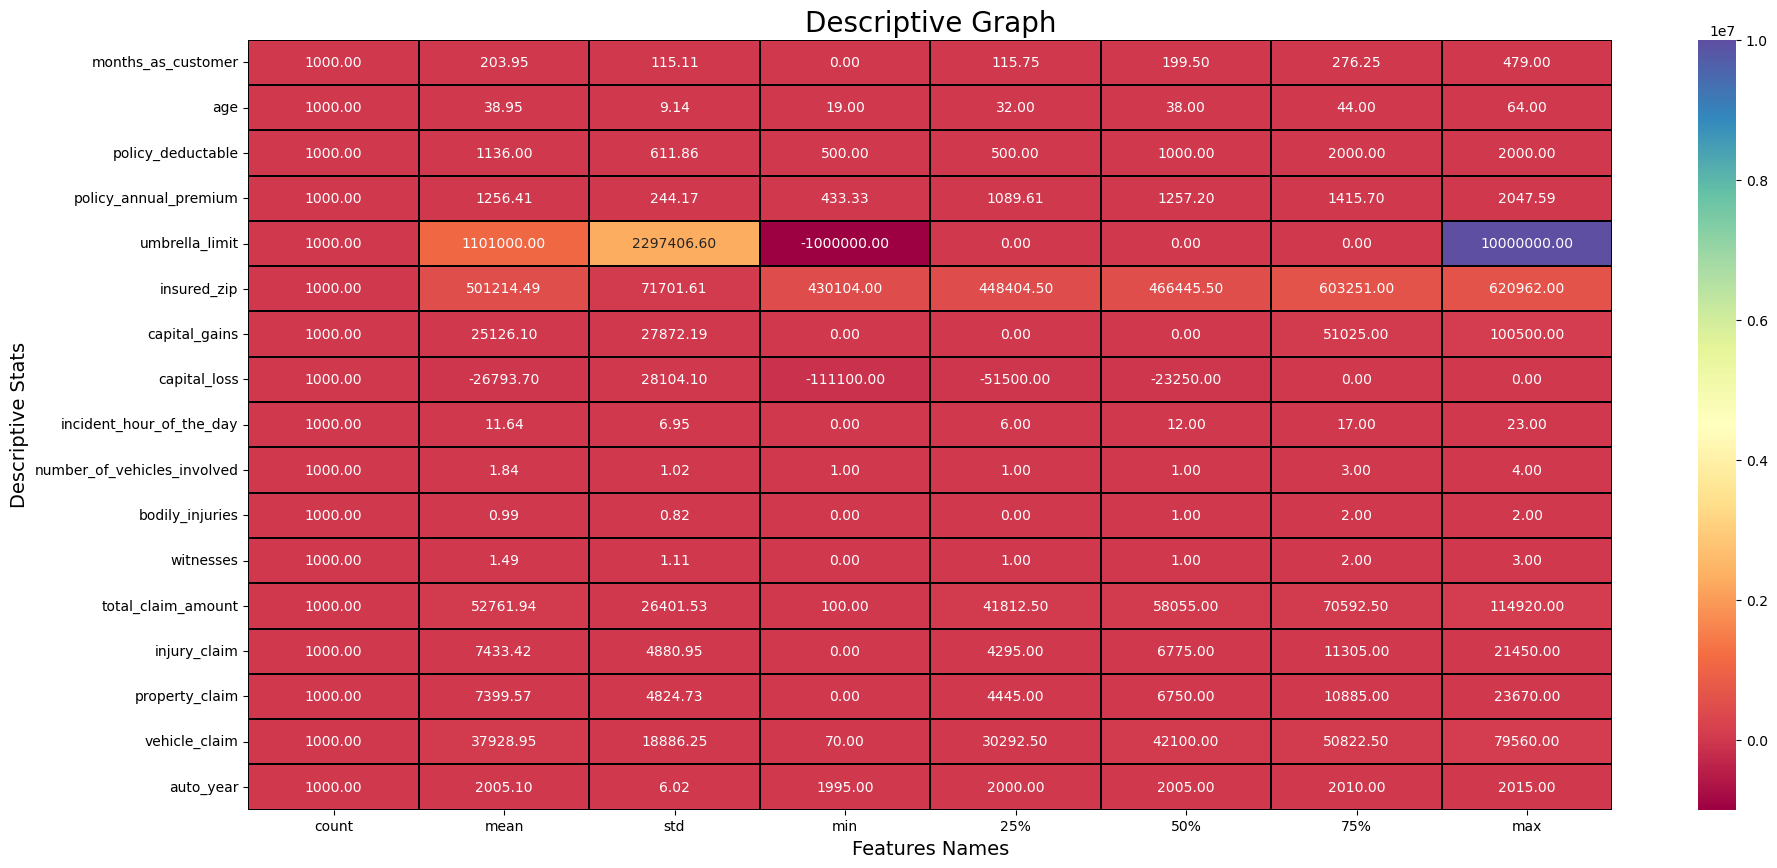

In [23]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe().T,annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Features Names",fontsize=14)
plt.ylabel("Descriptive Stats",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

# Data Visualization

# Univariate Analysis

N    753
Y    247
Name: fraud_reported, dtype: int64

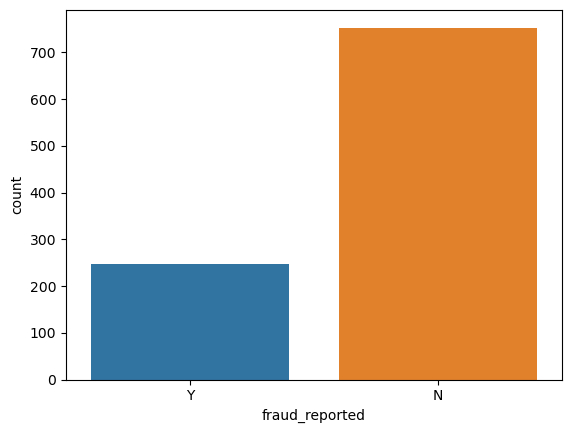

In [24]:
sns.countplot(x='fraud_reported',data=df)
df['fraud_reported'].value_counts()

Observation:Target variable shows biasedness and fraud_reported = N is more than 3 times of yes

# Bivariate Analysis

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

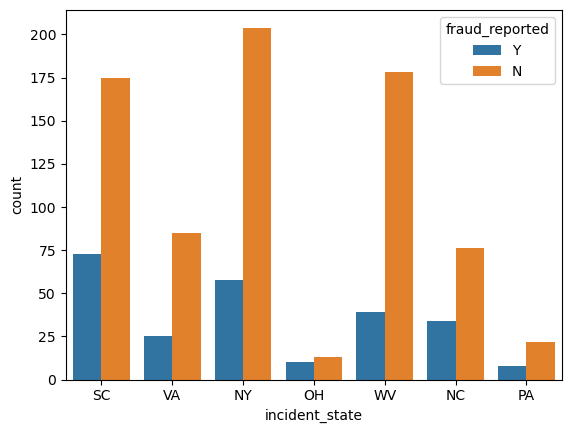

In [25]:
sns.countplot(x='incident_state',data=df,hue='fraud_reported')
df['incident_state'].value_counts()

Observation:
No of claims in Newyork is highest followed by SC and WV

Although the no of claims logged in OH is low % wise frauds is high in case of OH

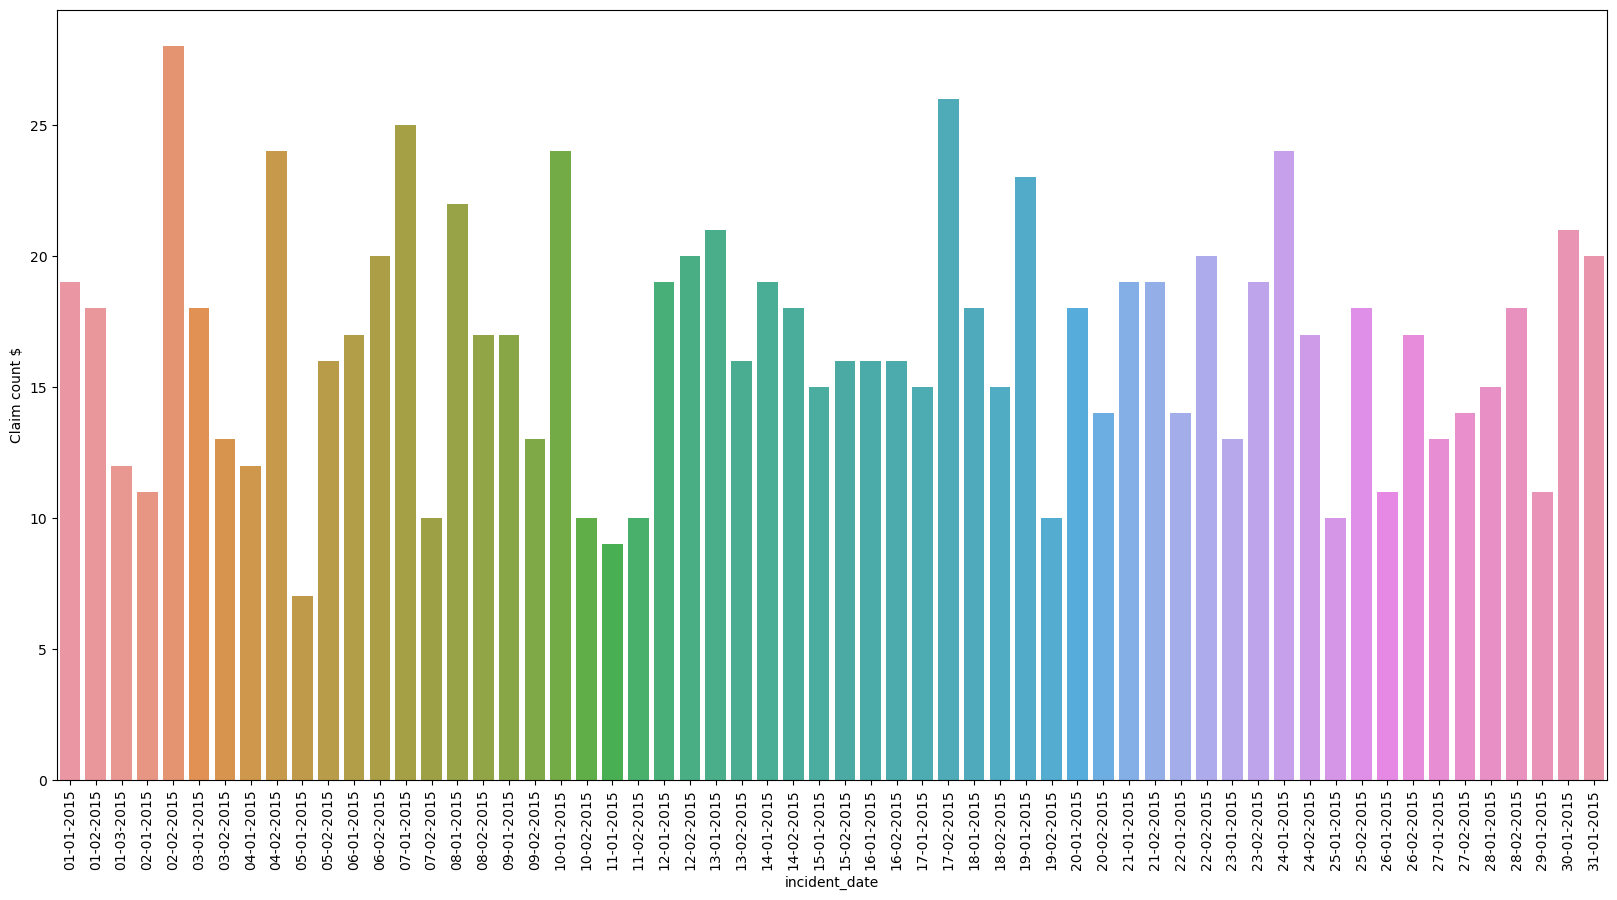

In [26]:
# Group the data by incident_date and calculate the count of claims
grouped_df = df.groupby('incident_date')['total_claim_amount'].count().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x="incident_date", y="total_claim_amount", data=grouped_df)
plt.xticks(rotation=90)
plt.ylabel('Claim count $')
plt.show()

Observation: The Incident dates covers the month of Jan and Feb

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

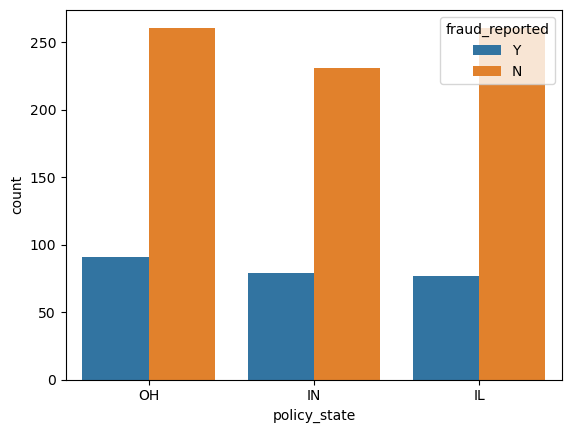

In [27]:
sns.countplot(x='policy_state',data=df,hue='fraud_reported')
df['policy_state'].value_counts()

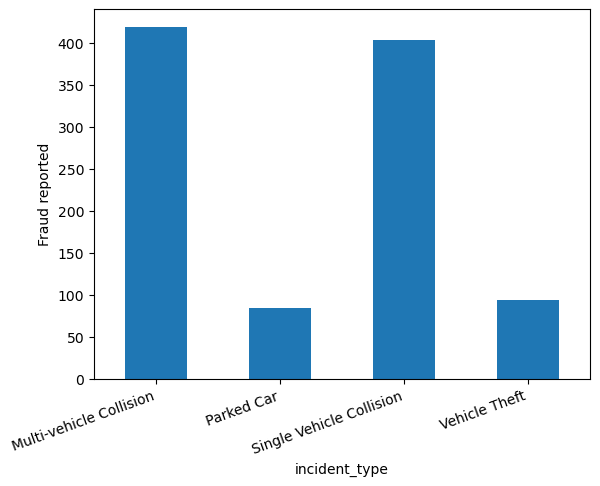

In [28]:
ax = df.groupby('incident_type').fraud_reported.count().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

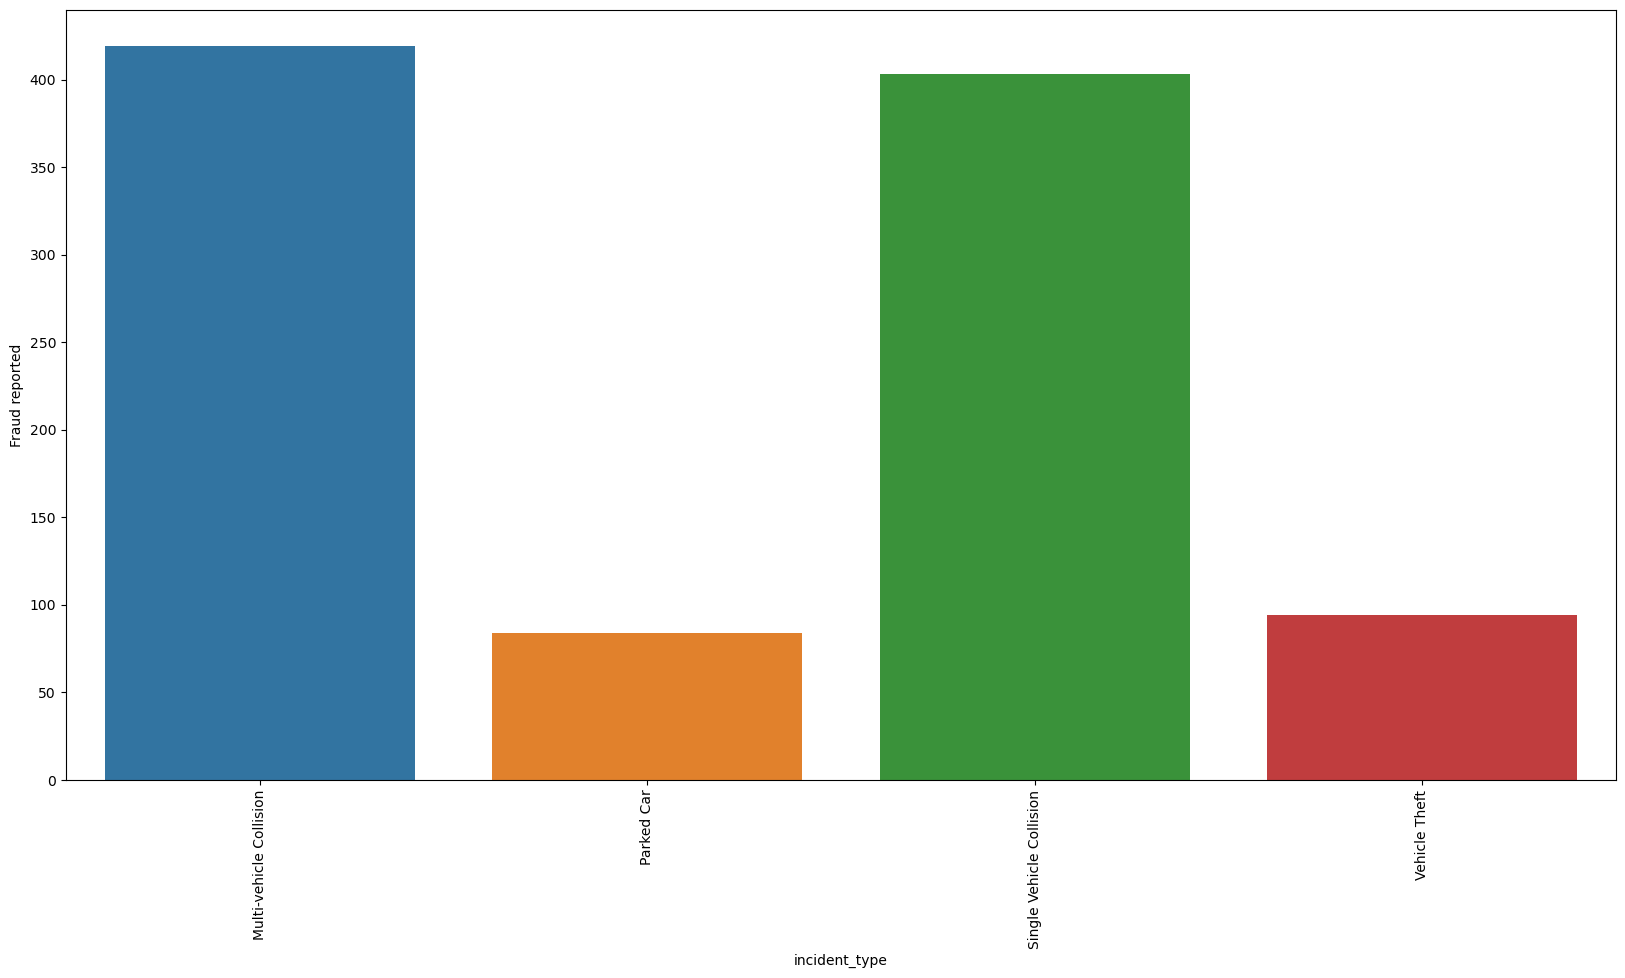

In [29]:
# Group the data by incident_date and calculate the count of claims
grouped_df = df.groupby('incident_type')['fraud_reported'].count().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x="incident_type", y="fraud_reported", data=grouped_df)
plt.xticks(rotation=90)
plt.ylabel('Fraud reported')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

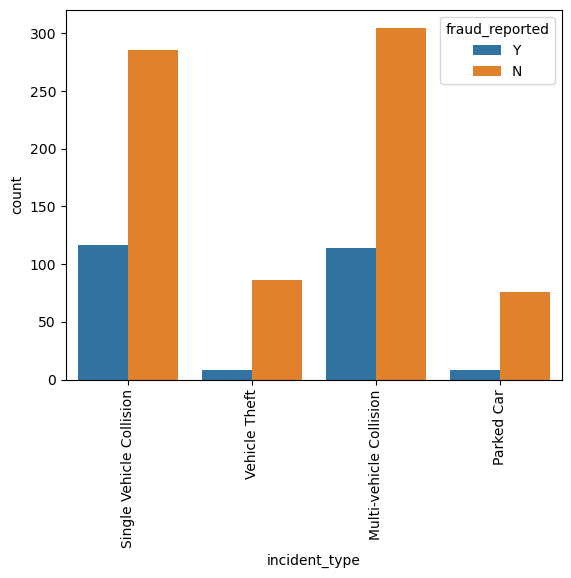

In [30]:
sns.countplot(x='incident_type',data=df,hue='fraud_reported')
df['incident_type'].value_counts()
plt.xticks(rotation=90)

Observation: Incidents are more in case of multi vehicle collision and Single vehicle collision. % wise it seems that frauds reported in case of these are also high

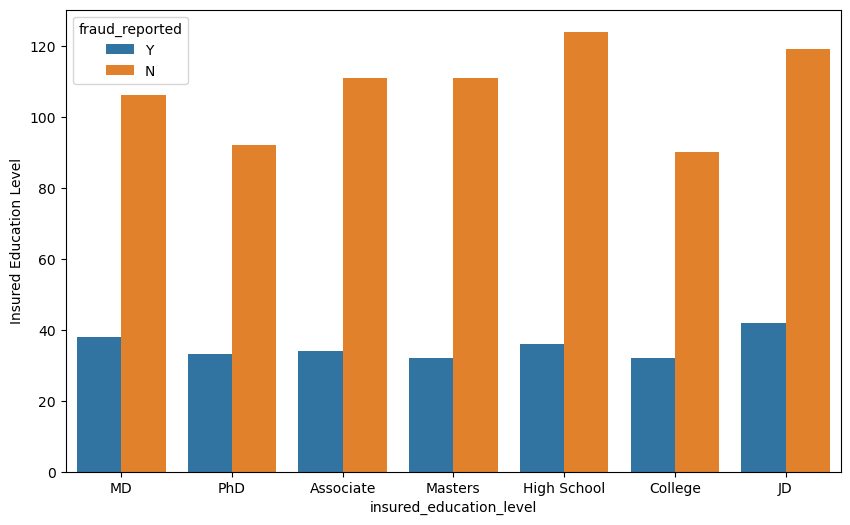

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x ='insured_education_level', hue='fraud_reported',data=df) 
plt.ylabel('Insured Education Level')
plt.show()

In [32]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

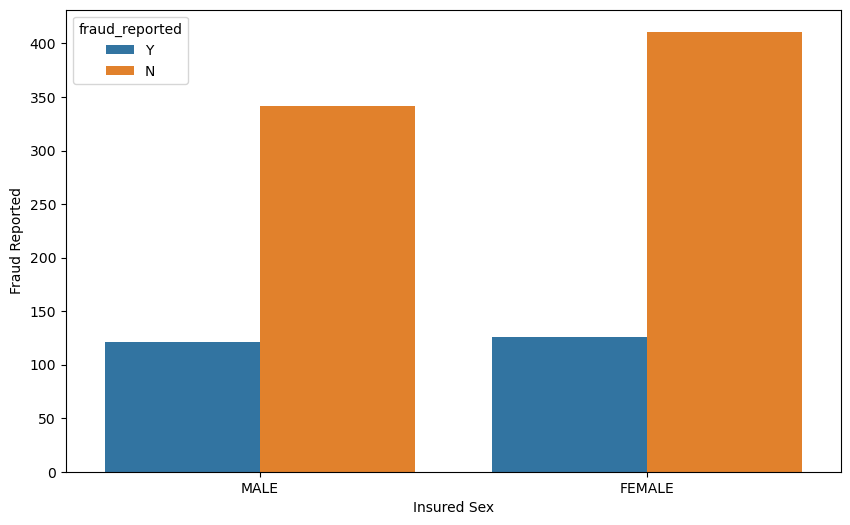

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'insured_sex', data=df,hue='fraud_reported') 
plt.xlabel('Insured Sex')
plt.ylabel('Fraud Reported')
plt.show()

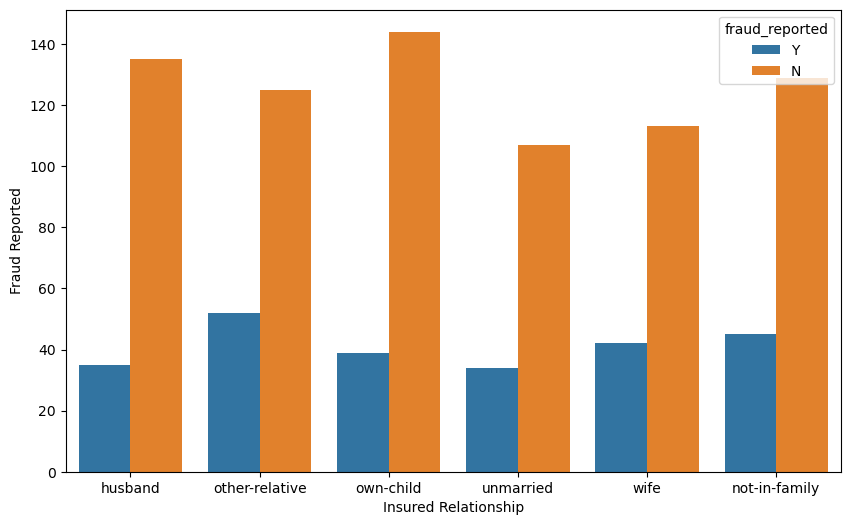

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'insured_relationship', data=df,hue='fraud_reported') 
plt.xlabel('Insured Relationship')
plt.ylabel('Fraud Reported')
plt.show()

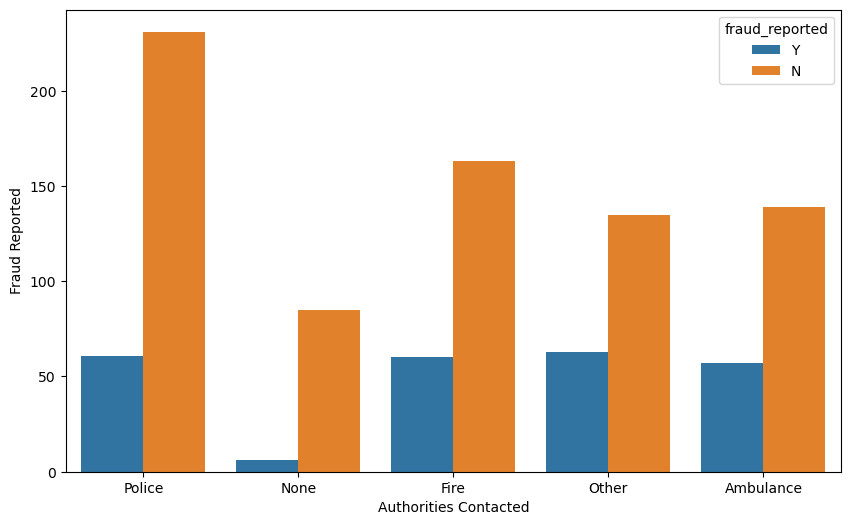

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'authorities_contacted', data=df,hue='fraud_reported') 
plt.xlabel('Authorities Contacted')
plt.ylabel('Fraud Reported')
plt.show()

<Axes: xlabel='auto_make', ylabel='count'>

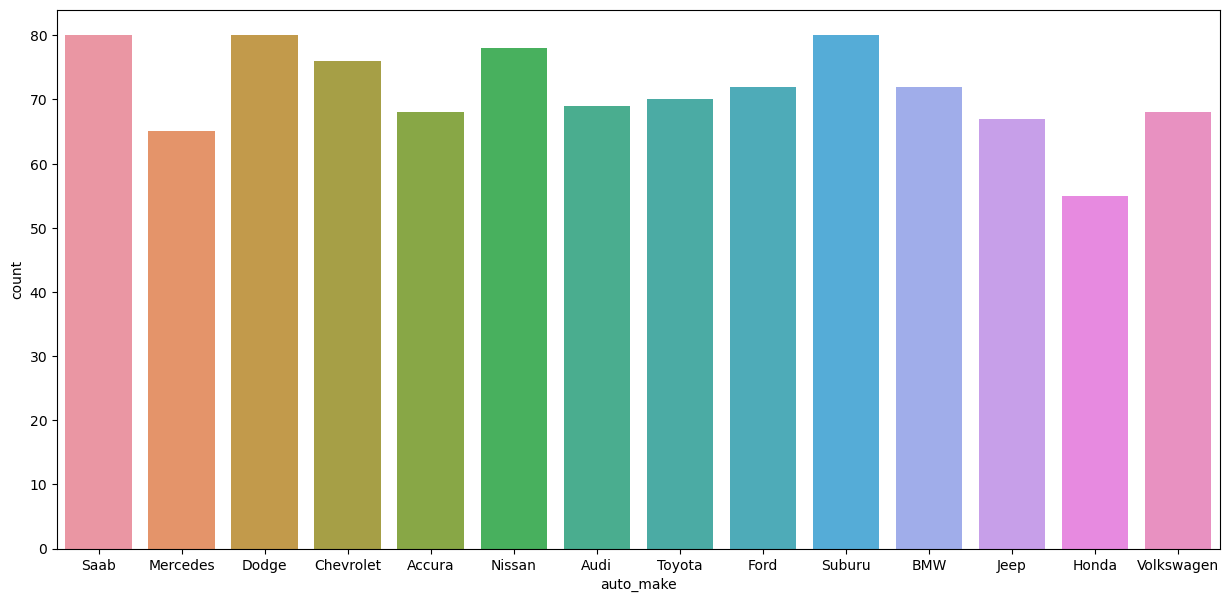

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_make', data=df)


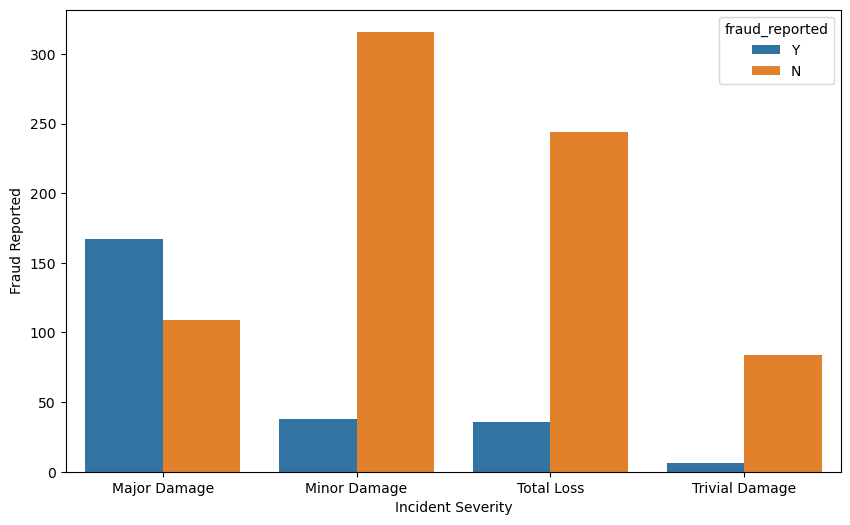

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'incident_severity', data=df,hue='fraud_reported') 
plt.xlabel('Incident Severity')
plt.ylabel('Fraud Reported')
plt.show()

Observation: Frauds were majorly reported in case of Major Damage

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

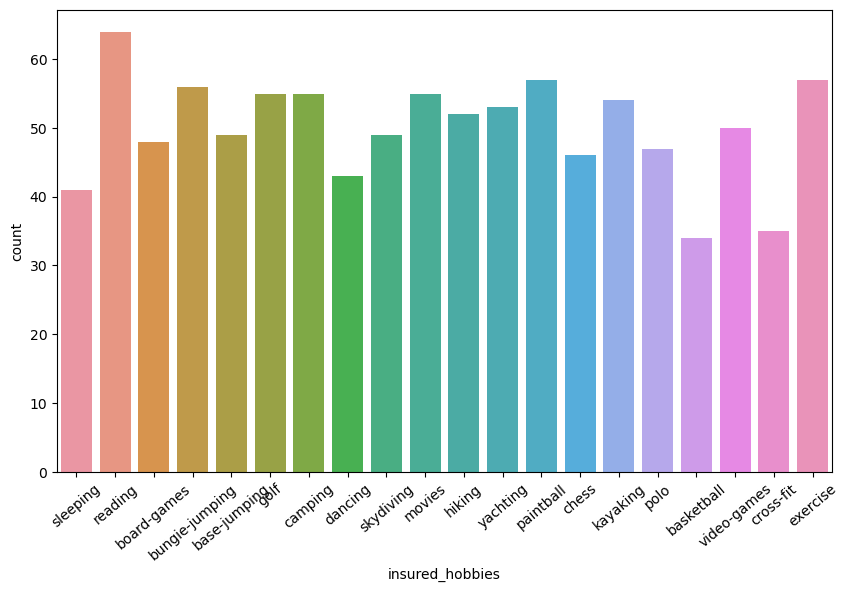

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='insured_hobbies', data=df)
plt.xticks(rotation=40)


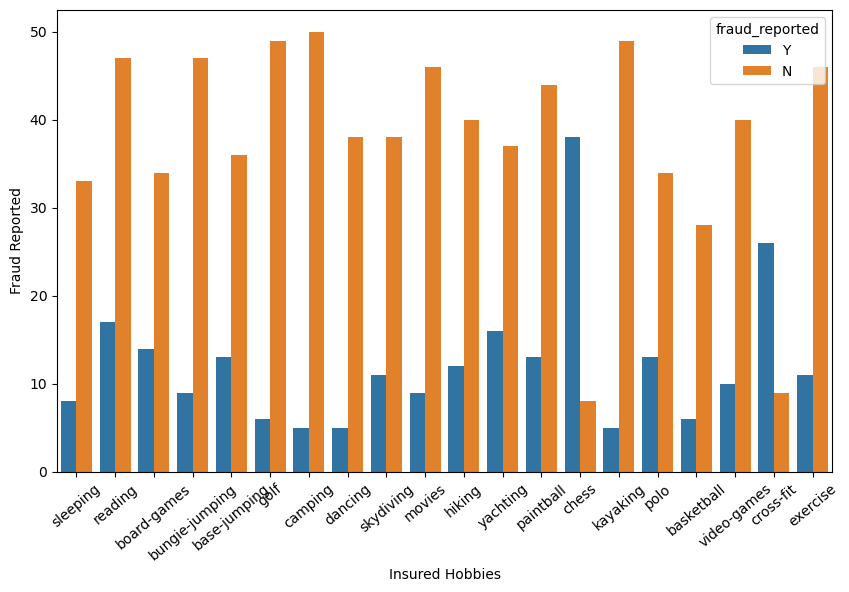

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'insured_hobbies', data=df,hue='fraud_reported') 
plt.xticks(rotation=40)
plt.xlabel('Insured Hobbies')
plt.ylabel('Fraud Reported')
plt.show()

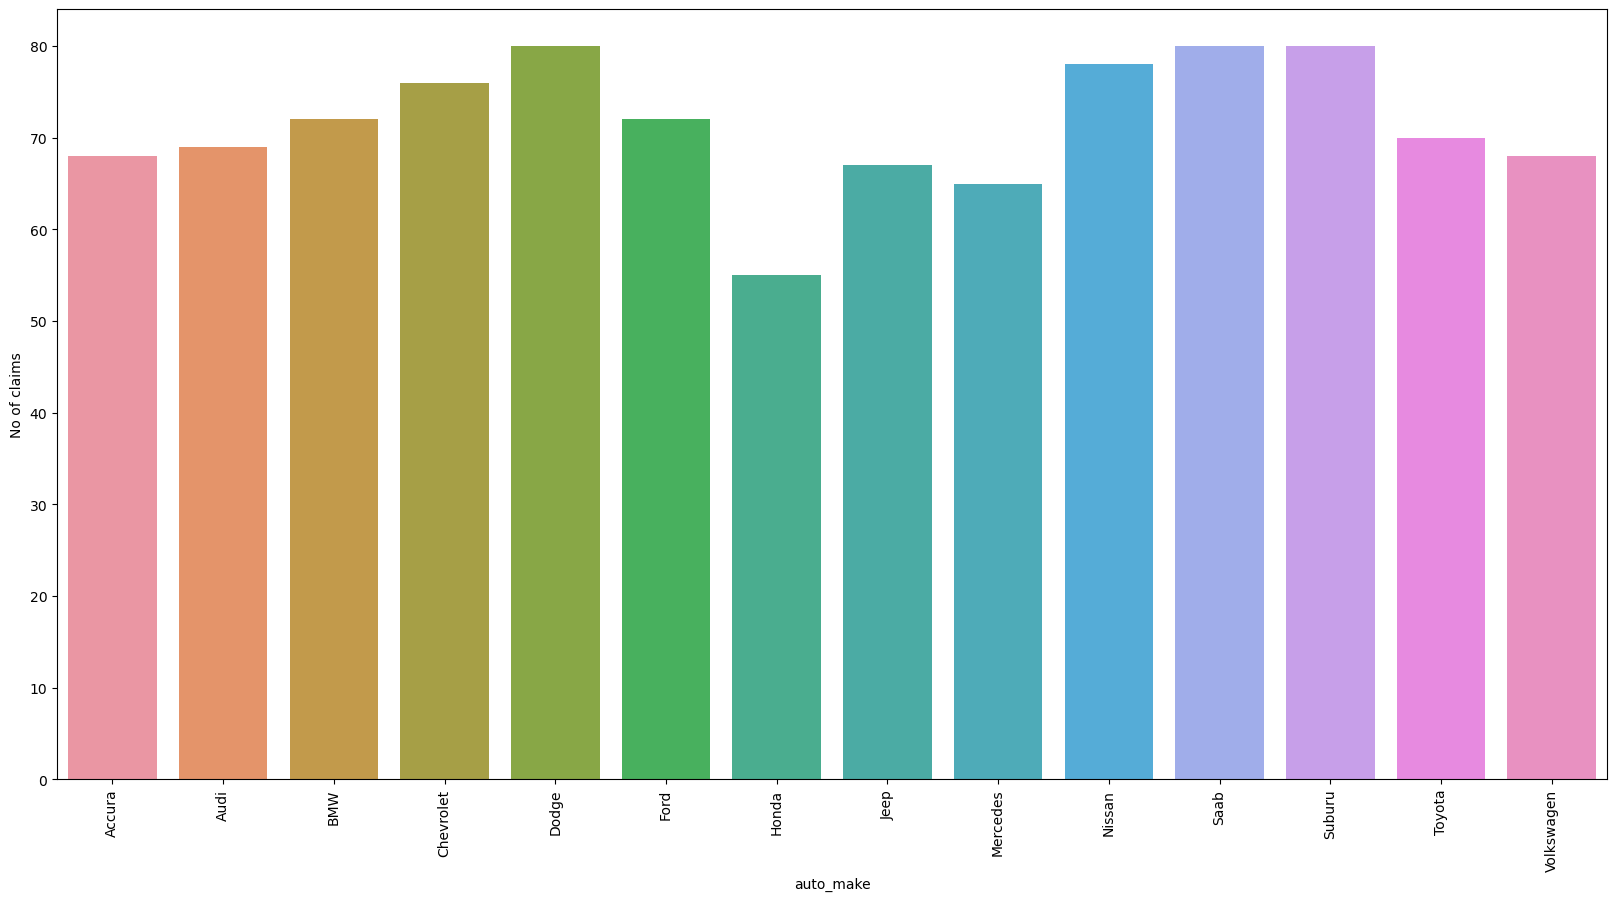

In [41]:

grouped_df = df.groupby('auto_make')['vehicle_claim'].count().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x="auto_make", y="vehicle_claim", data=grouped_df)
plt.xticks(rotation=90)
plt.ylabel('No of claims')
plt.show()

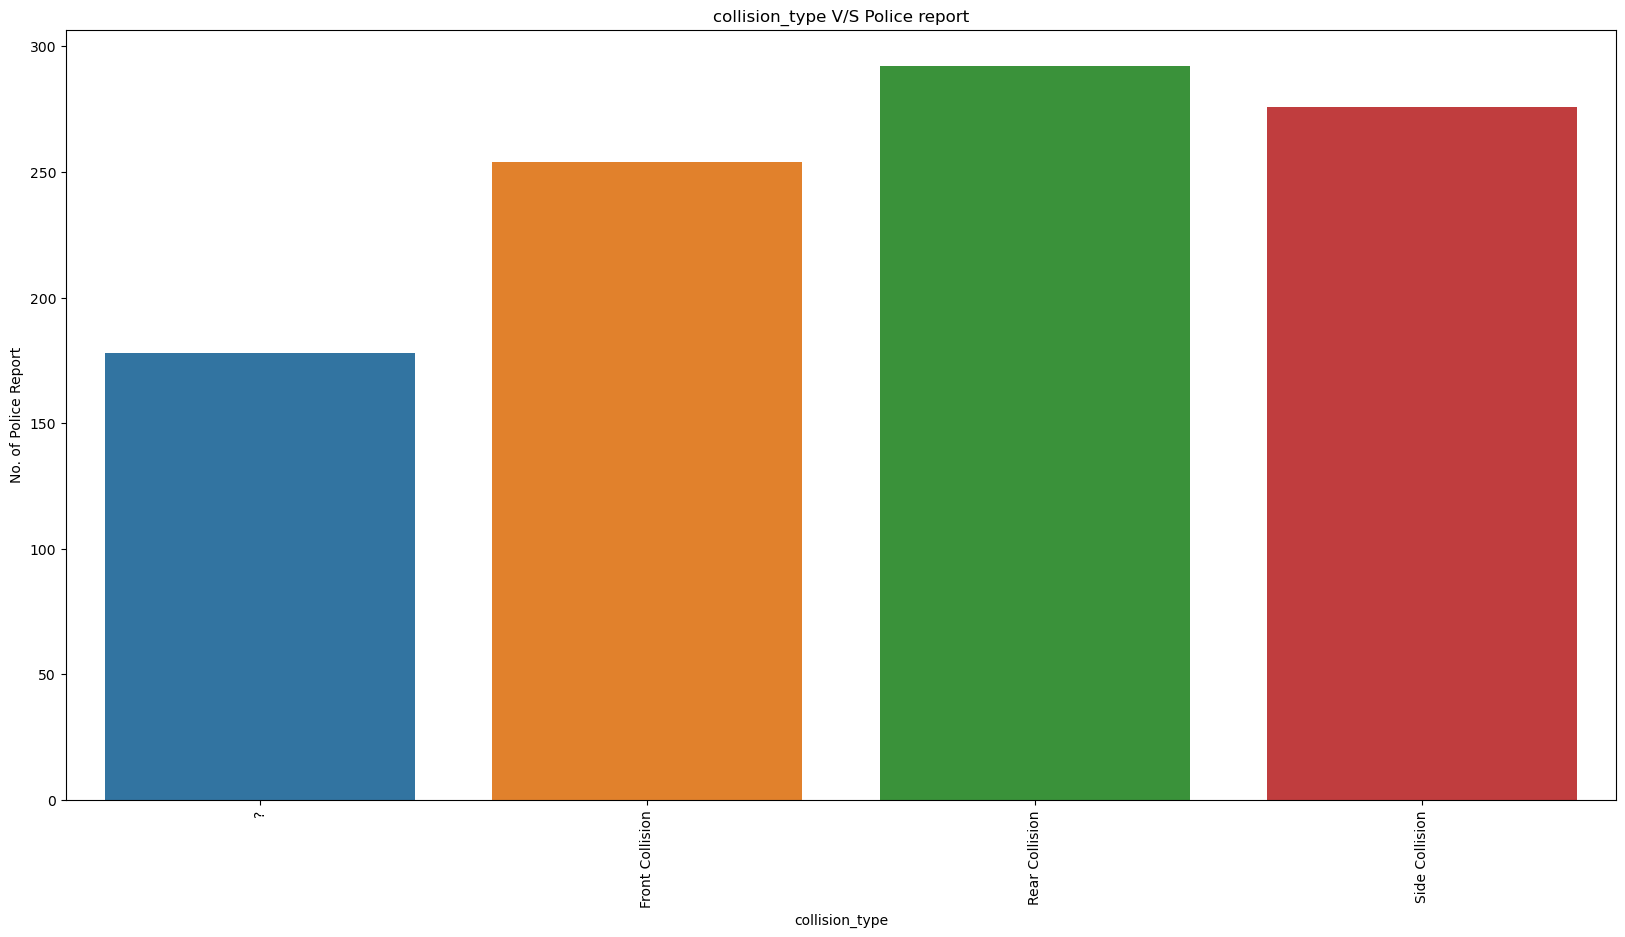

In [42]:

grouped_df = df.groupby('collision_type')['police_report_available'].count().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x="collision_type", y="police_report_available", data=grouped_df)
plt.xticks(rotation=90)
plt.ylabel('No. of Police Report')
plt.title('collision_type V/S Police report')
plt.show()

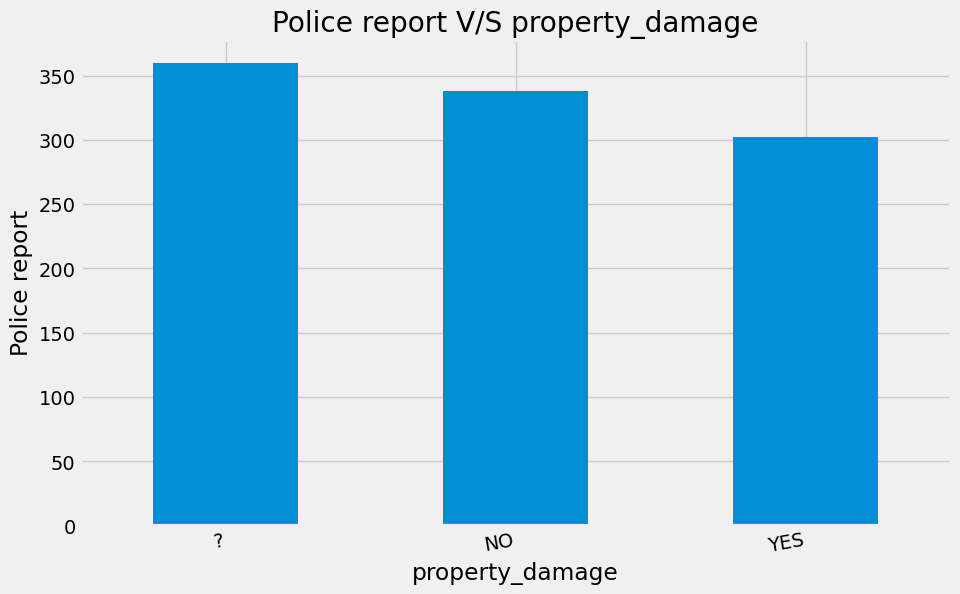

In [43]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.title('Police report V/S property_damage')
plt.show()

In [44]:
df.nunique()

months_as_customer             391
age                             46
policy_bind_date               951
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_zip                    995
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital_gains                  338
capital_loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_availa

# Dropping columns which will not impact the analysis

In [45]:
df = df.drop(columns = ['insured_zip', 'policy_bind_date', 'umbrella_limit' ,'incident_date', 'auto_year', 'incident_hour_of_the_day'])

In [46]:
df

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium insured_sex insured_education_level  \
0                  1406.91        MALE                      MD   
1                  1197.22        MALE                      MD   
2                  1413.14      FEMALE                     PhD   
3                  1415.74      FEMALE                     PhD   
4                  1583.91        MALE               Associate   
..                     ...         ...                     ...   
995                1310.80      FEMALE                 Masters   
996                1436.79      FEMALE                     PhD   
997                1383.49      FEMALE                 Masters   
998                1356.92        MALE               Associate   
999                 766.19      FEMALE               Associate   

    insured_occupation insured_hobbies  ... bodily_injuries  witnesses  \
0         craft-repair        sleeping  ...               1          2   
1    machine-op-inspct         reading  ...               0          0   
2                sales     board-games  ...               2          3   
3         armed-forces     board-games  ...               1          2   
4                sales     board-games  ...               0          1   
..                 ...             ...  ...             ...        ...   
995       craft-repair       paintball  ...               0          1   
996     prof-specialty        sleeping  ...               2          3   
997       armed-forces  bungie-jumping  ...               2          3   
998  handlers-cleaners    base-jumping  ...               0          1   
999              sales        kayaking  ...               0          3   

     police_report_available total_claim_amount injury_claim property_claim  \
0                        YES              71610         6510          13020   
1                          ?               5070          780            780   
2                         NO              34650         7700           3850   
3                         NO              63400         6340           6340   
4                         NO               6500         1300            650   
..                       ...                ...          ...            ...   
995                        ?              87200        17440           8720   
996                        ?             108480        18080          18080   
997                      YES              67500         7500           7500   
998                      YES              46980         5220           5220   
999                        ?               5060          460            920   

    vehicle_claim   auto_make auto_model  fraud_reported  
0           52080        Saab        92x               Y  
1            3510    Mercedes       E400               Y  
2           23100       Dodge        RAM               N  
3           50720   Chevrolet      Tahoe               Y  
4            4550      Accura        RSX               N  
..            ...         ...        ...             ...  
995         61040       Honda     Accord               N  
9

In [47]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported'],
      dtype='object')

In [48]:
df = df.replace("?", np.nan)

In [49]:
for column in ['collision_type','property_damage','police_report_available']: df[column].fillna(df[column].mode()[0],inplace=True)

In [50]:
df.collision_type.value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [51]:
df.property_damage.value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [52]:
df.police_report_available.value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

# Separating Categorical and Non Categorical Column

In [53]:
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Columns: ",cat_col)
print('\n')

Categorical Columns:  ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']




In [54]:
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Columns: ",num_col)
print('\n')

Numerical Columns:  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital_gains', 'capital_loss', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']




# Visualization of Continuous variables

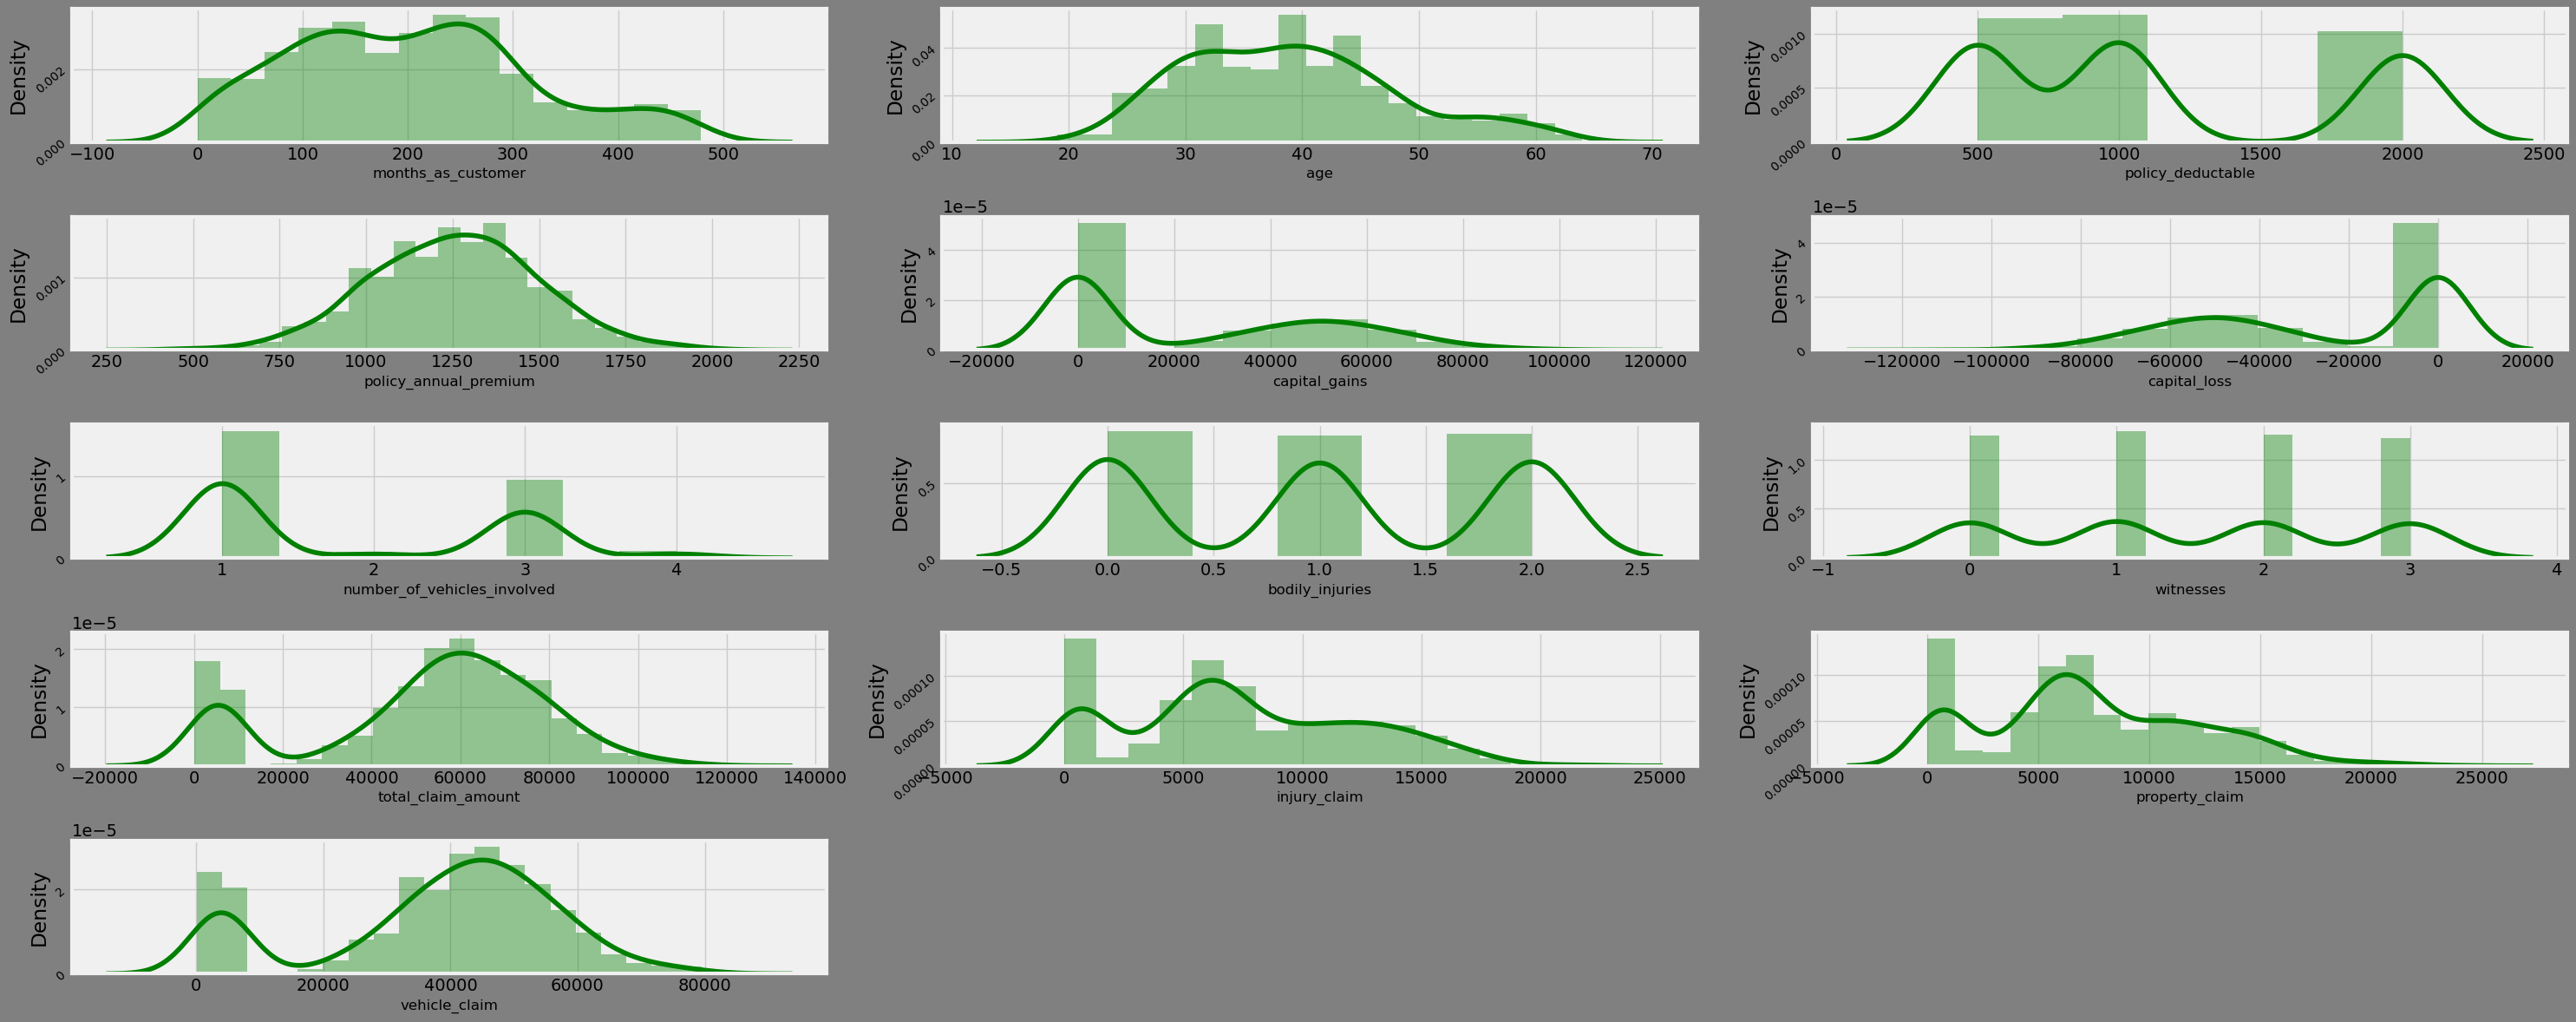

In [55]:
plt.figure(figsize=(30,12),facecolor='grey')
plotnumber = 1
for i in num_col:
    if plotnumber<16:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[i],color='g')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=40,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Observation: Data looks skewed in case of capital-gains and capital-Loss

# Multivariate Analysis

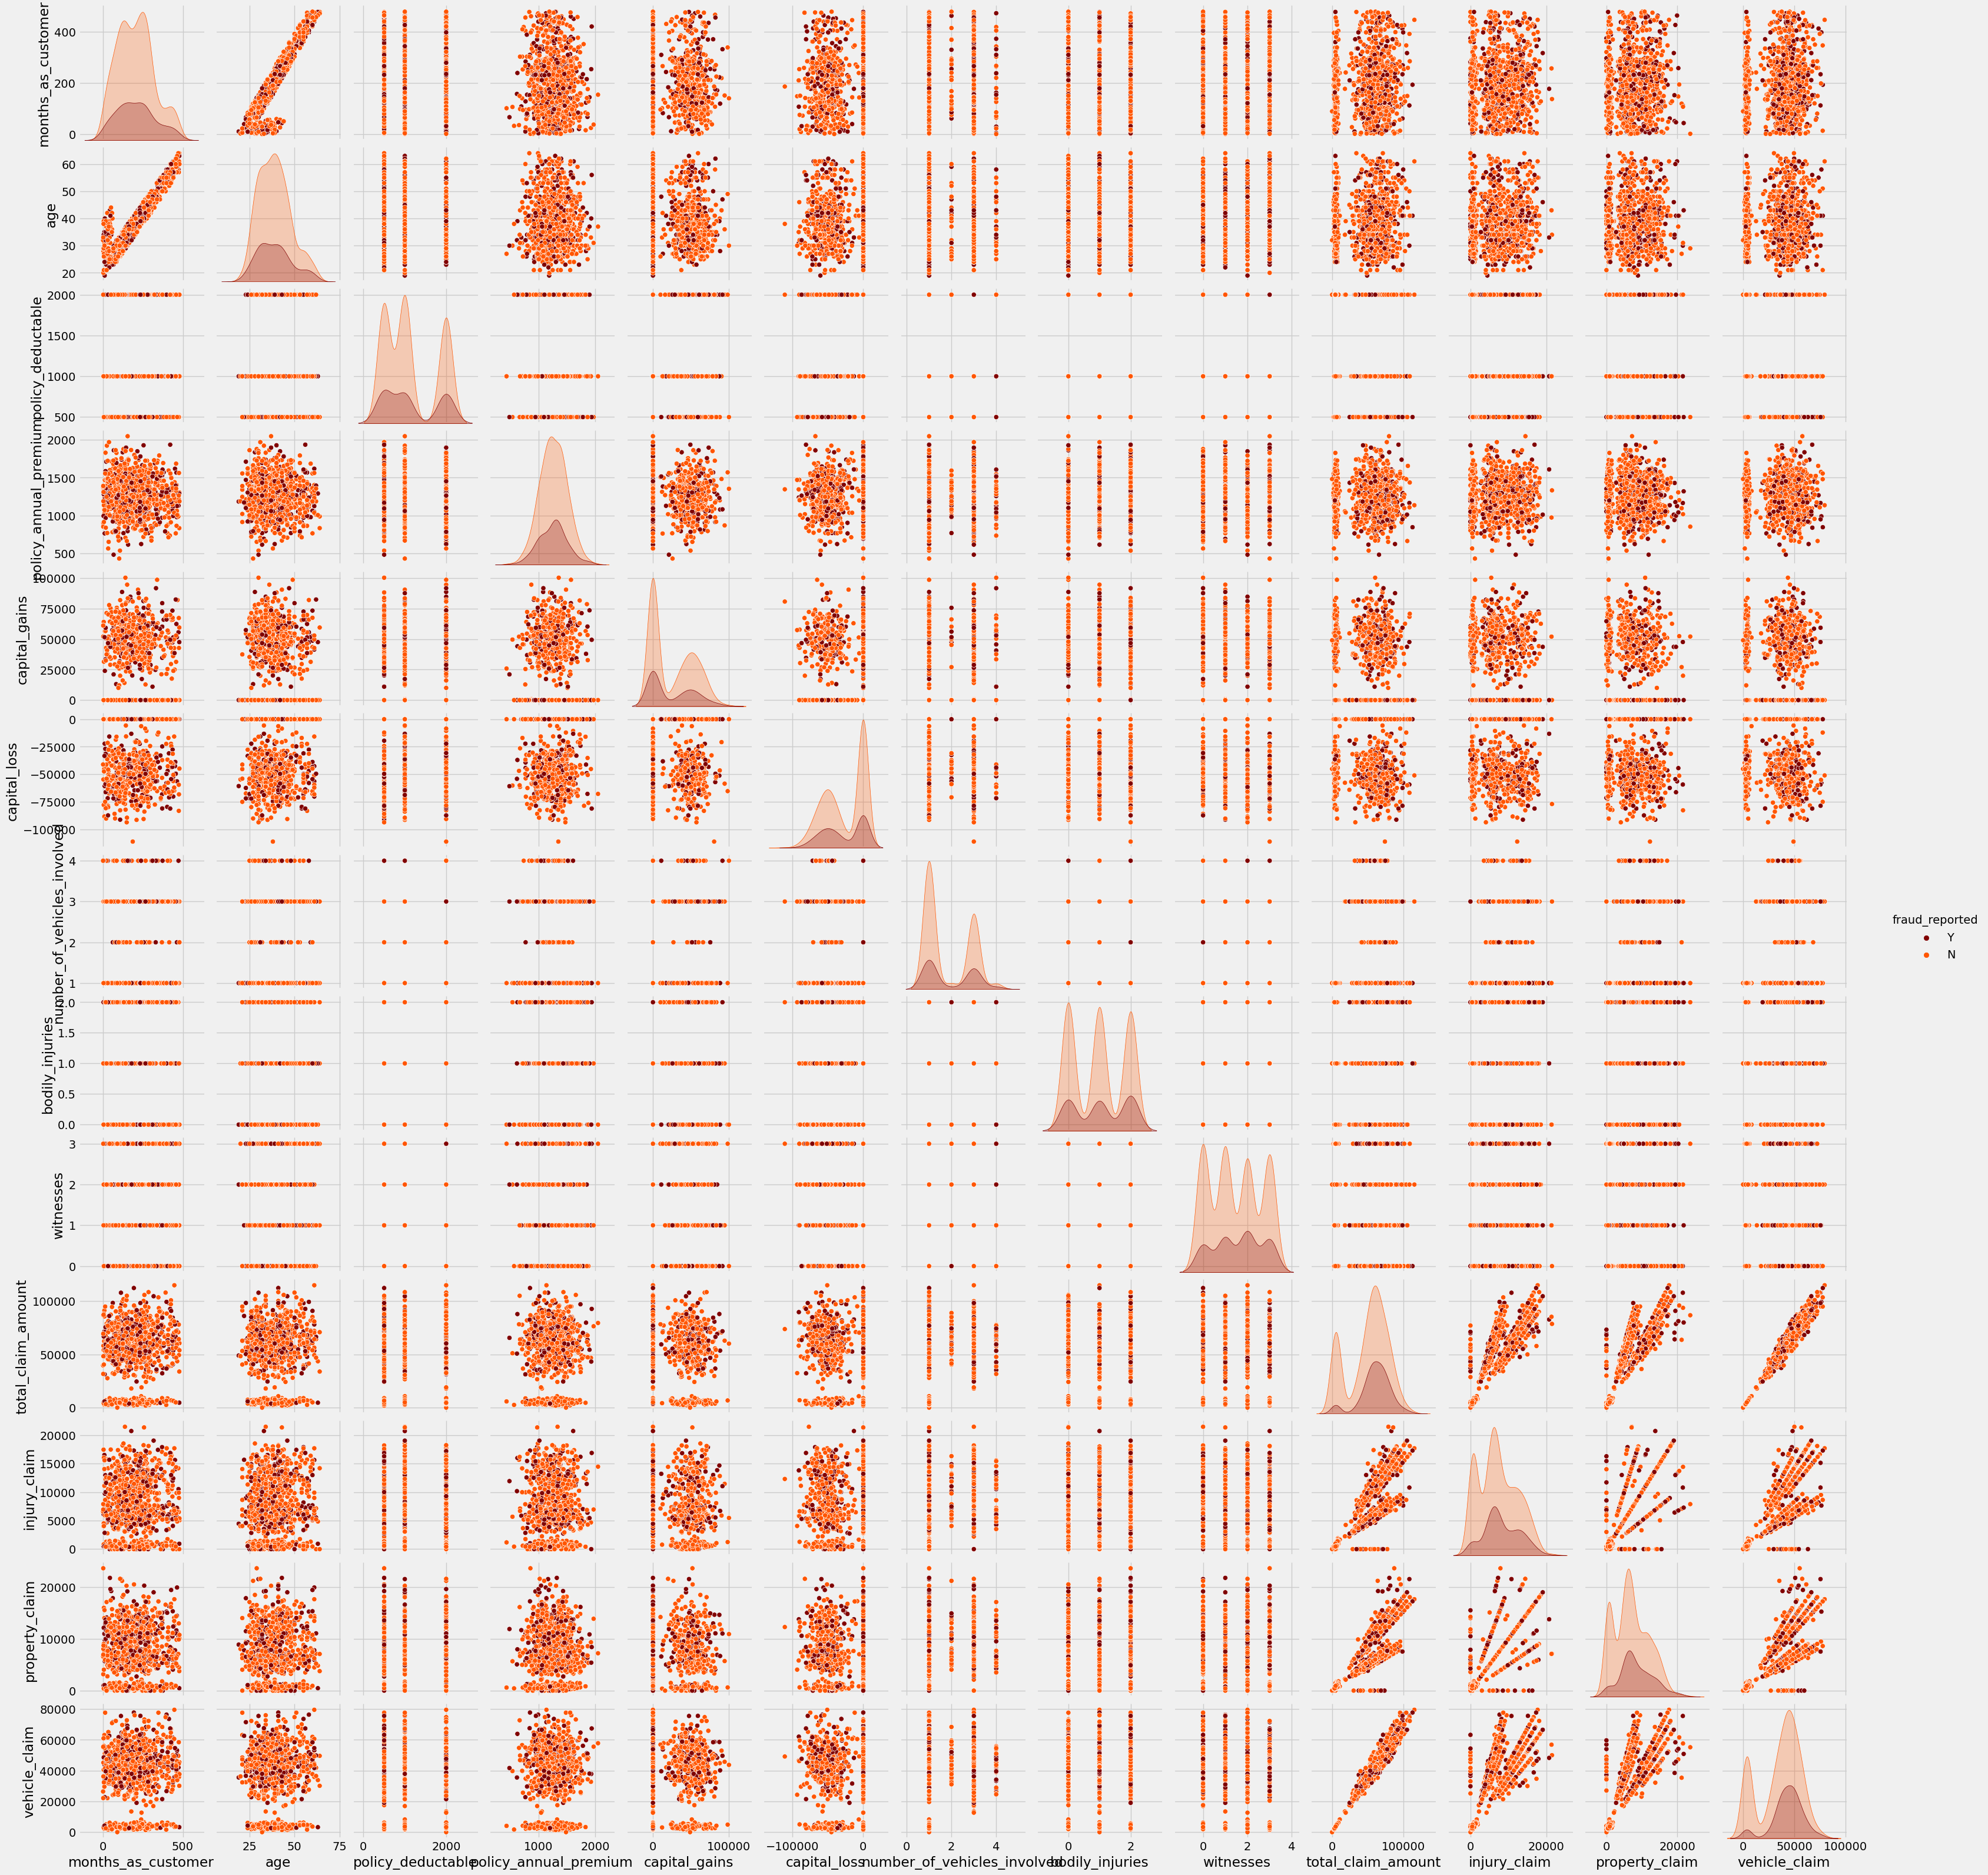

In [56]:
sns.pairplot(df,hue ='fraud_reported',palette='gist_heat')
plt.show()

# Checking Outliers

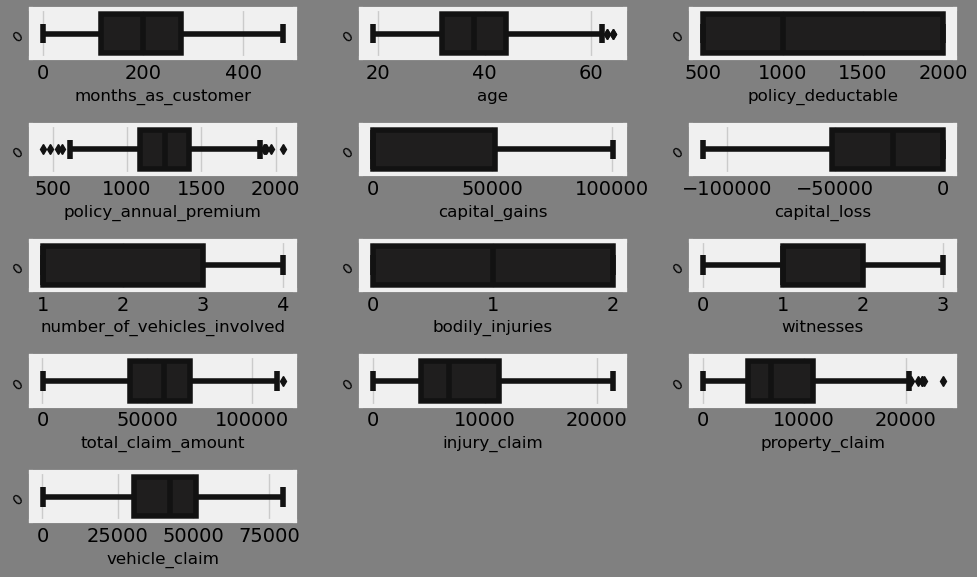

In [58]:
plt.figure(figsize=(10,6),facecolor='grey')
plotnumber = 1
for i in num_col:
    if plotnumber<16:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[i], palette = 'icefire', orient='h')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=40,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Outlier Treatment

In [62]:
from scipy.stats import zscore
out_features = df[['policy_annual_premium','property_claim','total_claim_amount']]
z = np.abs(zscore(out_features))
z

policy_annual_premium  property_claim  total_claim_amount
0                 0.616705        1.165505            0.714257
1                 0.242521        1.372696            1.807312
2                 0.642233        0.736072            0.686362
3                 0.652886        0.219722            0.403135
4                 1.341980        1.399654            1.753121
..                     ...             ...                 ...
995               0.222884        0.273817            1.305049
996               0.739141        2.214794            2.111466
997               0.520739        0.020826            0.558507
998               0.411866        0.451976            0.219110
999               2.008710        1.343664            1.807691

[1000 rows x 3 columns]

In [63]:
np.where(z>3)

(array([229, 248, 500, 763], dtype=int64), array([0, 0, 1, 0], dtype=int64))

In [64]:
df = df[(z<3).all(axis=1)]
df.shape

(996, 31)

# Checking Skewness

In [65]:
df.skew()

months_as_customer             0.359605
age                            0.474526
policy_deductable              0.473229
policy_annual_premium          0.032042
capital_gains                  0.478850
capital_loss                  -0.393015
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -0.593473
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.619755
dtype: float64

# Feature Preprocessing

#Using Label Encoder for converting Categorical Variable to Discrete variable

In [66]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in df:
    if df[i].dtypes=="object":
        df[i]=LE.fit_transform(df[i].values.reshape(-1,1))
        
        
df

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  insured_sex  insured_education_level  \
0                  1406.91            1                        4   
1                  1197.22            1                        4   
2                  1413.14            0                        6   
3                  1415.74            0                        6   
4                  1583.91            1                        0   
..                     ...          ...                      ...   
995                1310.80            0                        5   
996                1436.79            0                        6   
997                1383.49            0                        5   
998                1356.92            1                        0   
999                 766.19            0                        0   

     insured_occupation  insured_hobbies  ...  bodily_injuries  witnesses  \
0                     2               17  ...                1          2   
1                     6               15  ...                0          0   
2                    11                2  ...                2          3   
3                     1                2  ...                1          2   
4                    11                2  ...                0          1   
..                  ...              ...  ...              ...        ...   
995                   2               13  ...                0          1   
996                   9               17  ...                2          3   
997                   1                3  ...                2          3   
998                   5                0  ...                0          1   
999                  11               11  ...                0          3   

     police_report_available  total_claim_amount  injury_claim  \
0                          1               71610          6510   
1                          0                5070           780   
2                          0               34650          7700   
3                          0               63400          6340   
4                          0                6500          1300   
..                       ...                 ...           ...   
995                        0               87200         17440   
996                        0              108480         18080   
997                        1               67500          7500   
998                        1               46980          5220   
999                        0                5060           460   

     property_claim  vehicle_claim  auto_make  auto_model  fraud_reported  
0             13020          52080         10           1               1  
1               780           3510          8          12               1  
2              3850          23100          4          30               0  
3              6340          50720          3          34               1  
4               650           4550          0          31               0  
..              ...            ...        ...         ...             ...  
995          

# Correlation b/w target variable and independent variable

# Multicollinearity

In [67]:
cor=df.corr()
cor

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922092      0.000118   
age                                    0.922092  1.000000     -0.015182   
policy_state                           0.000118 -0.015182      1.000000   
policy_csl                            -0.022964 -0.012429     -0.000349   
policy_deductable                      0.023512  0.026772      0.010740   
policy_annual_premium                 -0.003378  0.005890      0.014475   
insured_sex                            0.059002  0.072900     -0.019294   
insured_education_level               -0.000848  0.001485     -0.032551   
insured_occupation                     0.005365  0.014030     -0.031016   
insured_hobbies                       -0.092575 -0.080587     -0.040215   
insured_relationship                   0.071097  0.075940     -0.018855   
capital_gains                          0.007601 -0.006333      0.072552   
capital_loss                           0.020771  0.008192     -0.032268   
incident_type                         -0.017202 -0.025979      0.031769   
collision_type                        -0.072479 -0.075892      0.050953   
incident_severity                     -0.061932 -0.060361     -0.026728   
authorities_contacted                  0.011406  0.016000     -0.017738   
incident_state                         0.006906  0.007053      0.009195   
incident_city                         -0.001837 -0.004009     -0.004475   
number_of_vehicles_involved            0.013609  0.021140     -0.043447   
property_damage                        0.002663 -0.005795     -0.009334   
bodily_injuries                       -0.011126 -0.017461      0.008992   
witnesses                              0.063530  0.056658      0.024809   
police_report_available               -0.018760 -0.018493      0.065957   
total_claim_amount                     0.064193  0.069989     -0.008498   
injury_claim                           0.066416  0.075480     -0.046398   
property_claim                         0.041157  0.064230      0.002678   
vehicle_claim                          0.062062  0.061949     -0.000560   
auto_make                              0.049222  0.032105      0.015848   
auto_model                             0.002908  0.016258     -0.024513   
fraud_reported                         0.020966  0.012408      0.028864   

                             policy_csl  policy_deductable  \
months_as_customer            -0.022964           0.023512   
age                           -0.012429           0.026772   
policy_state                  -0.000349           0.010740   
policy_csl                     1.000000           0.006149   
policy_deductable              0.006149           1.000000   
policy_annual_premium          0.030864          -0.008445   
insured_sex                   -0.008369          -0.011671   
insured_education_level        0.010380           0.014571   
insured_occupation             0.019598          -0.050024   
insured_hobbies               -0.007445           0.005134   
insured_relationship          -0.031813          -0.021763   
capital_gains                  0.004234           0.035950   
capital_loss                  -0.034396          -0.024018   
incident_type                  0.012411          -0.038696   
collision_type                 0.020799          -0.054153   
incident_severity              0.024522          -0.017352   
authorities_contacted          0.055746          -0.000210   
incident_state                 0.031912           0.007419   
incident_city                  0.010698          -0.046560   
number_of_vehicles_involved   -0.019778           0.051317   
property_damage               -0.025897           0.014131   
bodily_injuries               -0.000468          -0.023384   
witnesses                      0.069261           0.069433   
police_report_available       -0.005447           0.040969   
total_claim_amount            -0.058306           0.024621   
injury_claim    

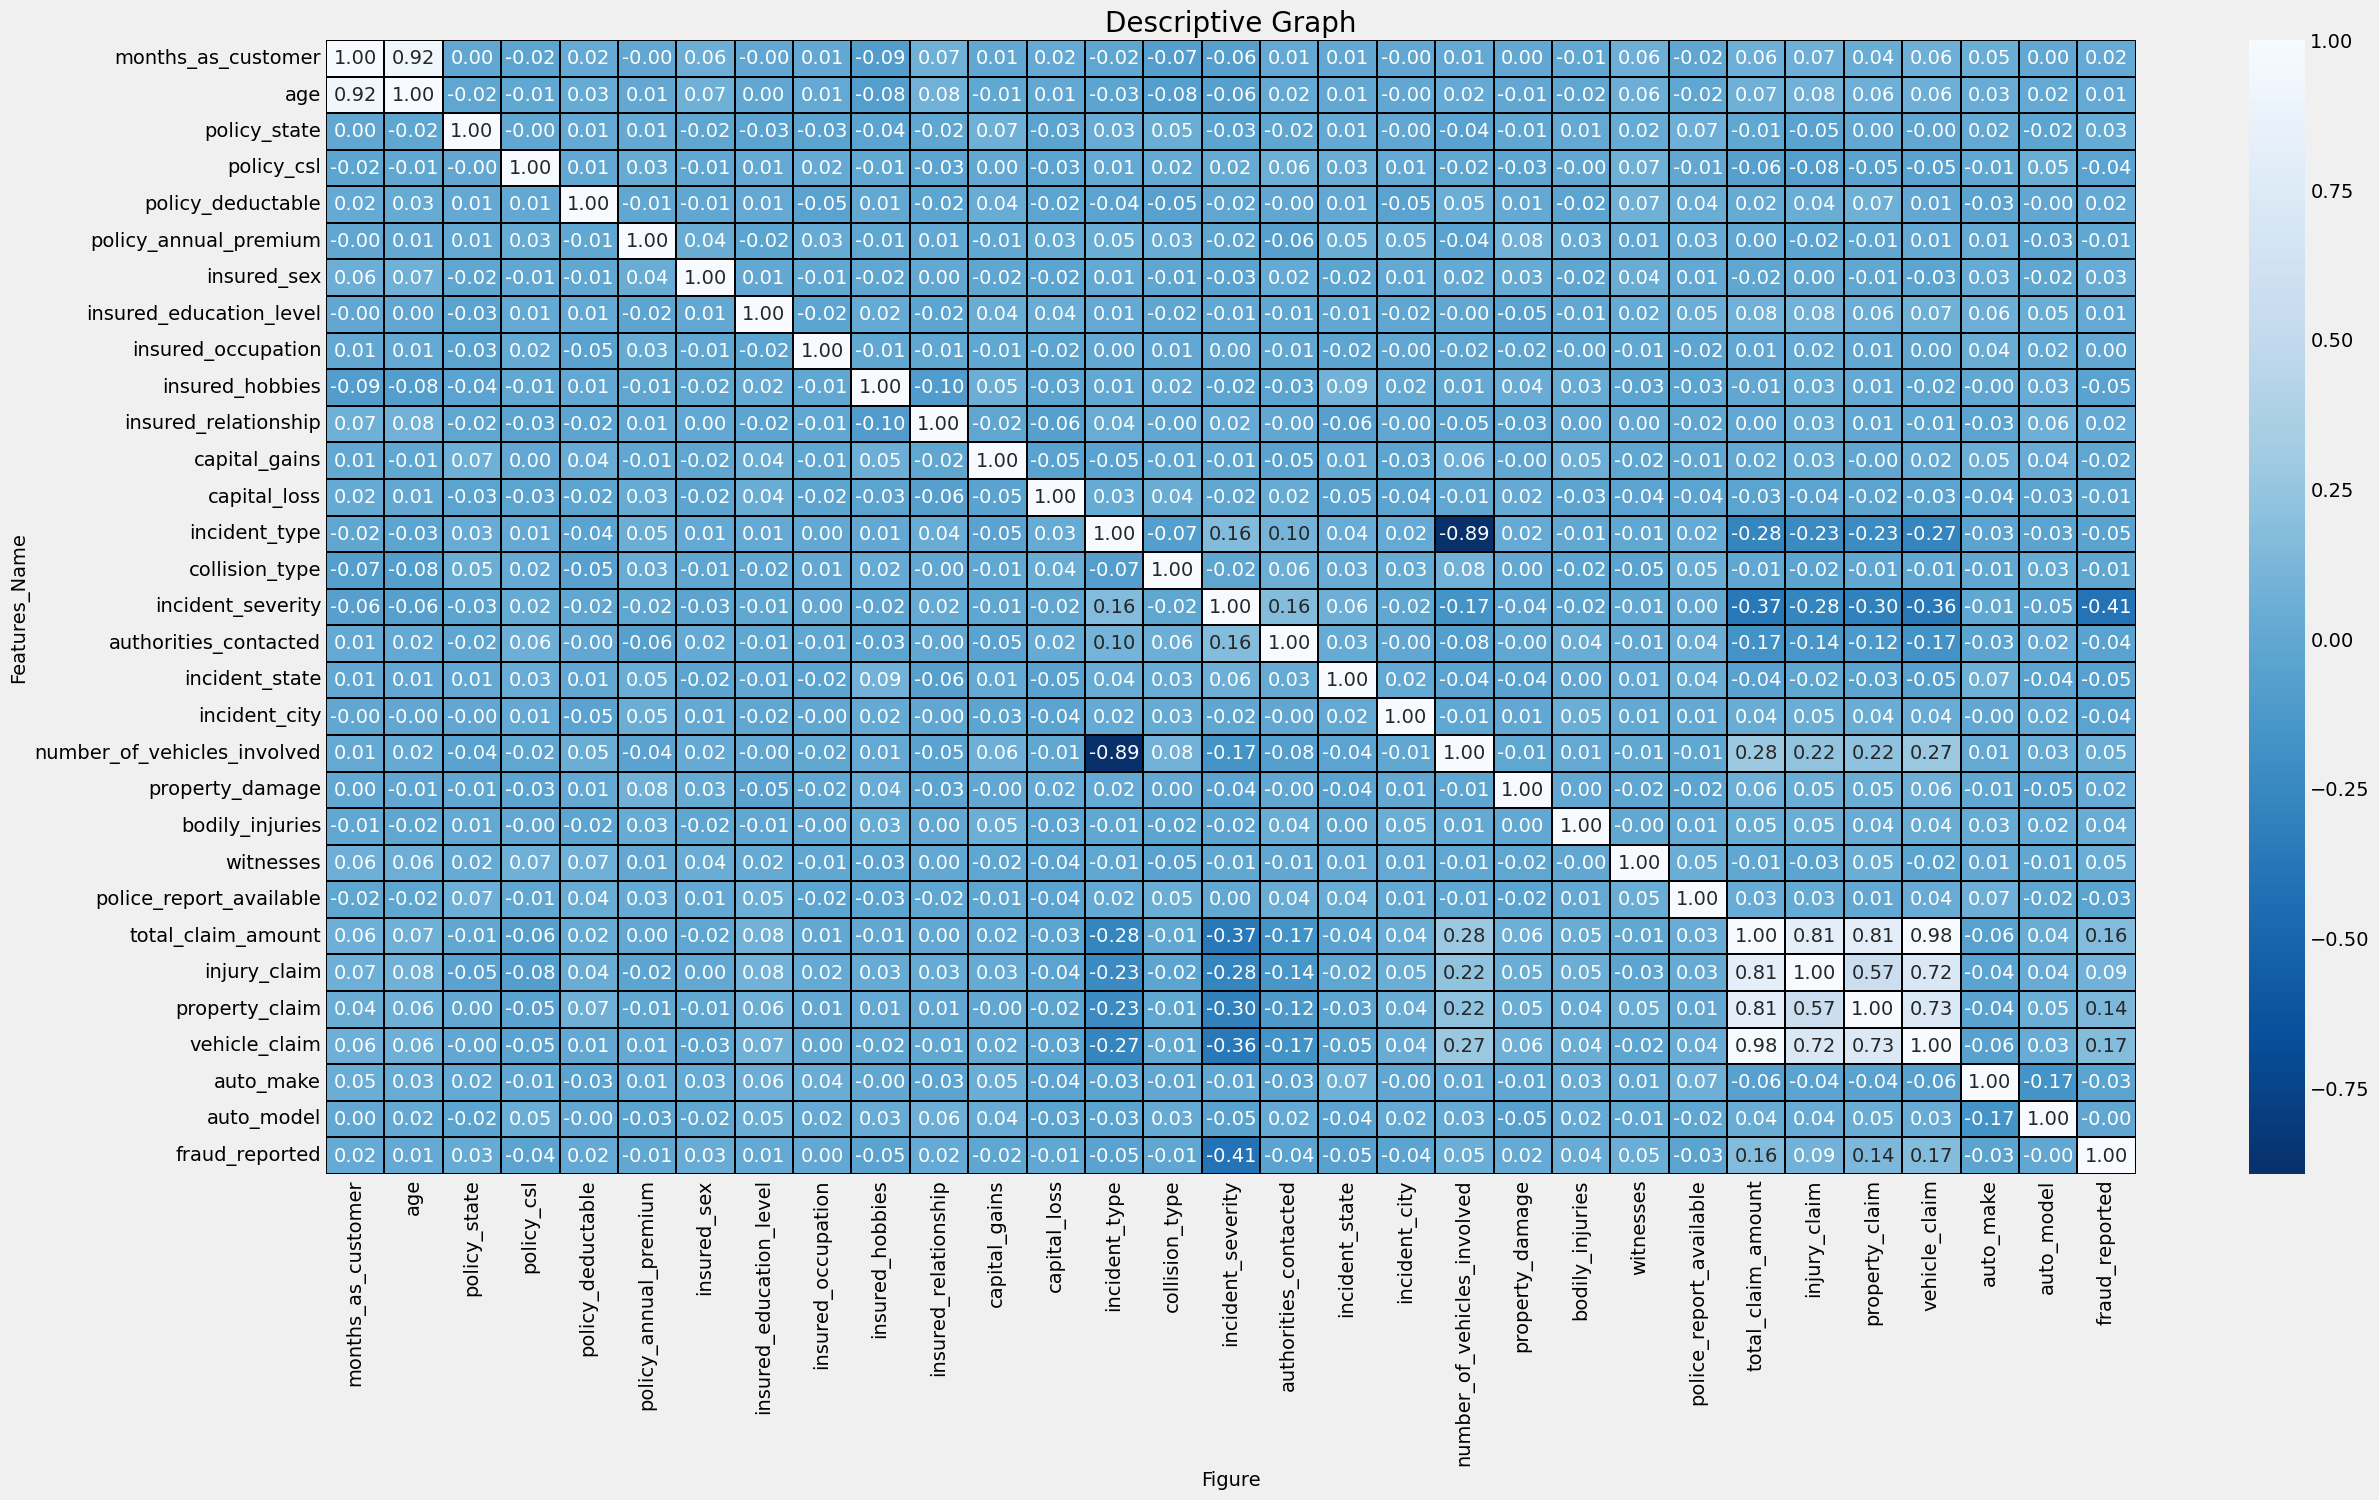

In [68]:
#Visualizing the correlation marix by using  heatmap

plt.figure(figsize=(26,14))
sns.heatmap(cor,annot=True,fmt="0.2f",linewidth = 0.2,linecolor="black", cmap="Blues_r")
plt.xlabel("Figure",fontsize=14)
plt.ylabel("Features_Name", fontsize=14)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

# Separating Feature and Label

In [69]:
x = df.drop('fraud_reported',axis=1)
y = df['fraud_reported']

In [70]:
x

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  insured_sex  insured_education_level  \
0                  1406.91            1                        4   
1                  1197.22            1                        4   
2                  1413.14            0                        6   
3                  1415.74            0                        6   
4                  1583.91            1                        0   
..                     ...          ...                      ...   
995                1310.80            0                        5   
996                1436.79            0                        6   
997                1383.49            0                        5   
998                1356.92            1                        0   
999                 766.19            0                        0   

     insured_occupation  insured_hobbies  ...  property_damage  \
0                     2               17  ...                1   
1                     6               15  ...                0   
2                    11                2  ...                0   
3                     1                2  ...                0   
4                    11                2  ...                0   
..                  ...              ...  ...              ...   
995                   2               13  ...                1   
996                   9               17  ...                1   
997                   1                3  ...                0   
998                   5                0  ...                0   
999                  11               11  ...                0   

     bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                  1          2                        1               71610   
1                  0          0                        0                5070   
2                  2          3                        0               34650   
3                  1          2                        0               63400   
4                  0          1                        0                6500   
..               ...        ...                      ...                 ...   
995                0          1                        0               87200   
996                2          3                        0              108480   
997                2          3                        1               67500   
998                0          1                        1               46980   
999                0          3                        0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  
0            6510           13020          52080         10           1  
1             780             780           3510          8          12  
2            7700            3850          23100          4          30  
3            6340            6340          50720          3          34  
4            1300             650           4550          0          31  
..            ...             ...            ...        ...      

In [71]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 996, dtype: int32

# Scaling Using Standard Scaler

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

months_as_customer       age  policy_state  policy_csl  \
0              1.074671  0.987190      1.186130    0.063660   
1              0.204846  0.330455     -0.018137    0.063660   
2             -0.612790 -1.092470      1.186130   -1.179582   
3              0.448397  0.221000     -1.222403    0.063660   
4              0.204846  0.549367     -1.222403    1.306902   
..                  ...       ...           ...         ...   
991           -1.752261 -0.107368      1.186130    1.306902   
992            0.700646  0.221000     -1.222403   -1.179582   
993           -0.647583 -0.545191      1.186130    0.063660   
994            2.205443  2.519571     -1.222403    1.306902   
995            2.188047  2.300659      1.186130    0.063660   

     policy_deductable  policy_annual_premium  insured_sex  \
0            -0.224722               0.621371     1.075102   
1             1.409024              -0.251375     1.075102   
2             1.409024               0.647301    -0.930144   
3             1.409024               0.658123    -0.930144   
4            -0.224722               1.358059     1.075102   
..                 ...                    ...          ...   
991          -0.224722               0.221354    -0.930144   
992          -0.224722               0.745734    -0.930144   
993          -1.041595               0.523896    -0.930144   
994           1.409024               0.413309     1.075102   
995          -0.224722              -2.045355    -0.930144   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
0                   0.531088           -1.162296         1.280299  ...   
1                   0.531088           -0.166257         0.928186  ...   
2                   1.557206            1.078792        -1.360550  ...   
3                   1.557206           -1.411305        -1.360550  ...   
4                  -1.521148            1.078792        -1.360550  ...   
..                       ...                 ...              ...  ...   
991                 1.044147           -1.162296         0.576073  ...   
992                 1.557206            0.580773         1.280299  ...   
993                 1.044147           -1.411305        -1.184493  ...   
994                -1.521148           -0.415266        -1.712663  ...   
995                -1.521148            1.078792         0.223960  ...   

     property_damage  bodily_injuries  witnesses  police_report_available  \
0           1.515920         0.007356   0.466826                 1.480644   
1          -0.659665        -1.213749  -1.335340                -0.675382   
2          -0.659665         1.228462   1.367910                -0.675382   
3          -0.659665         0.007356   0.466826                -0.675382   
4          -0.659665        -1.213749  -0.434257                -0.675382   
..               ...              ...        ...                      ...   
991         1.515920        -1.213749  -0.434257                -0.675382   
992         1.515920         1.228462   1.367910                -0.675382   
993        -0.659665         1.228462   1.367910                 1.480644   
994        -0.659665        -1.213749  -0.434257                 1.480644   
995        -0.659665        -1.213749   1.367910                -0.675382   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0              0.716023     -0.188161        1.174449       0.750488   
1             -1.808185     -1.363038       -1.376935      -1.824061   
2             -0.686062      0.055836       -0.737005      -0.785654   
3              0.404575     -0.223018       -0.217973       0.678398   
4             -1.753938     -1.256417       -1.404033      -1.768934   
..                  ...           ...             ...            ...   
991            1.307433      2.052922        0.278129       1.225430   
992            2.114694      2.184148        2.229188       1.823349   
993            0.560110      0.014828    

# Checking Variance Inflation Factor

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values                     Features
0     6.824147           months_as_customer
1     6.819946                          age
2     1.029713                 policy_state
3     1.024445                   policy_csl
4     1.034108            policy_deductable
5     1.032803        policy_annual_premium
6     1.023079                  insured_sex
7     1.031920      insured_education_level
8     1.013714           insured_occupation
9     1.045917              insured_hobbies
10    1.038380         insured_relationship
11    1.031670                capital_gains
12    1.034520                 capital_loss
13    5.087349                incident_type
14    1.038293               collision_type
15    1.192794            incident_severity
16    1.072385        authorities_contacted
17    1.036952               incident_state
18    1.016157                incident_city
19    5.084897  number_of_vehicles_involved
20    1.026024              property_damage
21    1.016746              bodily_injuries
22    1.037681                    witnesses
23    1.033511      police_report_available
24         inf           total_claim_amount
25         inf                 injury_claim
26         inf               property_claim
27         inf                vehicle_claim
28    1.068643                    auto_make
29    1.058059                   auto_model

# Applying oversampling using SMOTE

In [74]:
y.value_counts()

0    750
1    246
Name: fraud_reported, dtype: int64

In [75]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y = SM.fit_resample(x,y) 

In [76]:
y.value_counts()

1    750
0    750
Name: fraud_reported, dtype: int64

# Determination of Fraud Reported - Classification Problem

# Modelling

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [78]:
# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Extra Tree', ExtraTreesClassifier()),
    ('Bagging', BaggingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('SVC',SVC()),
    ('GNB',GaussianNB())]

# Variables to store the best results
best_random_states = []
best_accuracies = []

# Evaluate each model
for model_name, model in models:
    maxAcc = 0
    maxRs = 0
    for i in range(1, 200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        acc = accuracy_score(y_test, pred)
        if acc > maxAcc:
            maxAcc = acc
            maxRs = i
    best_random_states.append((model_name, maxRs))
    best_accuracies.append((model_name, maxAcc))
    print("Max r2 score for ",model_name, "is:", maxAcc, "on Random State", maxRs)

# Print summary of results
print("\nSummary of best random states and accuracies for each model:")
for i in range(len(models)):
    model_name = models[i][0]
    print("Maximum Accuracy score is", best_accuracies[i][1], "on Random_state", best_random_states[i][1])

Max r2 score for  Logistic Regression is: 0.78 on Random State 93
Max r2 score for  Gradient Boosting is: 0.93 on Random State 80
Max r2 score for  Random Forest is: 0.93 on Random State 80
Max r2 score for  KNN is: 0.7766666666666666 on Random State 136
Max r2 score for  Extra Tree is: 0.9566666666666667 on Random State 80
Max r2 score for  Bagging is: 0.9233333333333333 on Random State 80
Max r2 score for  AdaBoost is: 0.9033333333333333 on Random State 44
Max r2 score for  SVC is: 0.9066666666666666 on Random State 1
Max r2 score for  GNB is: 0.79 on Random State 1

Summary of best random states and accuracies for each model:
Maximum r2 score is 0.78 on Random_state 93
Maximum r2 score is 0.93 on Random_state 80
Maximum r2 score is 0.93 on Random_state 80
Maximum r2 score is 0.7766666666666666 on Random_state 136
Maximum r2 score is 0.9566666666666667 on Random_state 80
Maximum r2 score is 0.9233333333333333 on Random_state 80
Maximum r2 score is 0.9033333333333333 on Random_state 4

# Creating Train Test Split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=93)

# a) Logistic Regression

In [80]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.78
[[107  29]
 [ 37 127]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       136
           1       0.81      0.77      0.79       164

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [81]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predLR)-score.mean())

[0.71333333 0.72333333 0.70333333 0.76       0.77333333]
0.7346666666666668
Difference betn accuracy score and CVC is:  0.045333333333333226


# b) Gradient Boosting Classifier

In [82]:
#Setting best random_state for Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=80)

In [83]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc = gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.9333333333333333
[[138   9]
 [ 11 142]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       147
           1       0.94      0.93      0.93       153

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [84]:
score=cross_val_score(gbc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predgbc)-score.mean())

[0.77333333 0.85333333 0.91333333 0.93       0.93      ]
0.8800000000000001
Difference betn accuracy score and CVC is:  0.05333333333333323


# c) Random Forest Classifier

In [85]:
#Setting best random_state for Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=80)

In [86]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9333333333333333
[[139   8]
 [ 12 141]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       147
           1       0.95      0.92      0.93       153

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [87]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predRFC)-score.mean())

[0.74333333 0.83333333 0.91666667 0.93       0.93666667]
0.8720000000000001
Difference betn accuracy score and CVC is:  0.06133333333333324


# d) K Neighbors Classifier

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=136)

In [89]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7766666666666666
[[ 66  59]
 [  8 167]]
              precision    recall  f1-score   support

           0       0.89      0.53      0.66       125
           1       0.74      0.95      0.83       175

    accuracy                           0.78       300
   macro avg       0.82      0.74      0.75       300
weighted avg       0.80      0.78      0.76       300



In [90]:
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVS is: ", accuracy_score(y_test,predknn)-score.mean())

[0.68       0.65333333 0.67666667 0.71       0.71333333]
0.6866666666666668
Difference betn accuracy score and CVS is:  0.08999999999999986


# e)Extra Tree Classifier

In [91]:
#Setting best random_state for Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=80)

In [92]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc = etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.9533333333333334
[[139   8]
 [  6 147]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       147
           1       0.95      0.96      0.95       153

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [93]:
score=cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predetc)-score.mean())

[0.84       0.9        0.92333333 0.94333333 0.95333333]
0.9119999999999999
Difference betn accuracy score and CVC is:  0.041333333333333444


# f) Bagging Classifier

In [98]:
#Setting best random_state for Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=80)

In [99]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.91
[[138   9]
 [ 18 135]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       147
           1       0.94      0.88      0.91       153

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [100]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predbc)-score.mean())

[0.79       0.88       0.90666667 0.9        0.91666667]
0.8786666666666667
Difference betn accuracy score and CVC is:  0.031333333333333324


# g) AdaBoost Classifier

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=44)

In [102]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc = abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.9033333333333333
[[131  14]
 [ 15 140]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       145
           1       0.91      0.90      0.91       155

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [103]:
score=cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predabc)-score.mean())

[0.70333333 0.79       0.9        0.92       0.92666667]
0.8480000000000001
Difference betn accuracy score and CVC is:  0.055333333333333234


# h) Support Machine Vector Classifier

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [105]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9066666666666666
[[142  16]
 [ 12 130]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       158
           1       0.89      0.92      0.90       142

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [106]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predsvc)-score.mean())

[0.79666667 0.83       0.86       0.88666667 0.90333333]
0.8553333333333333
Difference betn accuracy score and CVC is:  0.05133333333333334


# i) Gaussian NB

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [108]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
predGNB = GNB.predict(x_test)
print(accuracy_score(y_test,predGNB))
print(confusion_matrix(y_test,predGNB))
print(classification_report(y_test,predGNB))

0.79
[[108  50]
 [ 13 129]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       158
           1       0.72      0.91      0.80       142

    accuracy                           0.79       300
   macro avg       0.81      0.80      0.79       300
weighted avg       0.81      0.79      0.79       300



In [109]:
score=cross_val_score(GNB,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predGNB)-score.mean())

[0.69666667 0.69       0.70666667 0.72333333 0.75666667]
0.7146666666666667
Difference betn accuracy score and CVC is:  0.07533333333333336


Observation: Considering the difference between accuracy score and CVC as .041 and accuracy 95% the best model is Extra Tree Classifier

# Hyper Parameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameters = {"criterion" : ["gini","entropy"],
             "random_state" : [10,50,1000],
             "max_depth" : [None,10,20],
             "n_jobs" : [-2,-1,1],
             "n_estimators" : [50,100,200,300]}

In [112]:
GCV= GridSearchCV(ExtraTreesClassifier(),parameters, cv = 5)

In [113]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [114]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 50}

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=80)

In [123]:
fraud_detect_model=ExtraTreesClassifier()
fraud_detect_model.fit(x_train,y_train)
pred=fraud_detect_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

96.33333333333334
[[143   4]
 [  7 146]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       147
           1       0.97      0.95      0.96       153

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



# AUC ROC CURVE

In [124]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [126]:
y_pred_prob = fraud_detect_model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

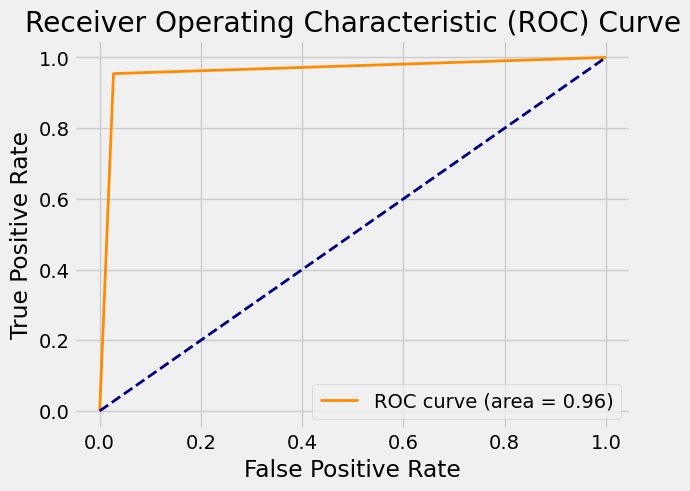

In [127]:
# plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Saving the model

In [129]:
import joblib
joblib.dump(fraud_detect_model,'insurance_fraud_reported.pki')

['insurance_fraud_reported.pki']

In [130]:
model = joblib.load('insurance_fraud_reported.pki')
prediction = model.predict(x_test)
prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [131]:
a = np.array(y_test)
df_t = pd.DataFrame()
df_t['Predicted'] = prediction
df_t['Original'] = a

In [132]:
df_t.sample(20)

Predicted  Original
217          1         1
109          1         1
153          1         1
216          0         0
42           1         1
289          0         1
83           0         0
249          0         0
88           0         0
293          0         0
95           1         1
176          1         1
28           1         1
192          1         1
25           1         1
106          0         0
207          0         0
182          1         1
235          1         1
141          1         1